<a id="1"></a>
# <div style="text-align: center; background-color: #569db3; color: white; padding: 14px; line-height: 1;border-radius:20px">Key Performance Indicators (KPIs)</div>

# **`1- Obesity Rate (KPIs):`**
  * 1- Calculate the percentage of individuals in each BMI    category (underweight, normal, overweight, obese) to understand the obesity rate within the dataset.</br>
  * 2-`Number of Main Meals`:</br>
    * Investigate the correlation between the number of main meals (NCP) individuals have and their weights . Determine whether eating frequency relates to obesity.</br>
  * 3-`Vegetable Consumption`:</br>
    * how the frequency of consuming vegetables (FCVC) correlates with obesity level. Determine if a higher intake of vegetables is associated with lower obesity rates.</br>
  * 4-`High-Caloric Food Consumption`:</br>
    * Examine the relationship between the frequent consumption of high-caloric food (FAVC) and obesity level. Determine if this habit contributes to obesity.</br>
  * 5-`Consumption Between Meals `:</br>
    * Investigate the impact of consuming food between meals (CAEC) on obesity. Analyze whether snacking habits relate to obesity level.</br>
  * 6- `Physical Activity`:</br>
    *  Analyze the relationship between physical activity frequency (FAF) and obesity level. Determine whether higher physical activity levels are associated with lower obesity rates</br>
  * 7-`Age and Obesity`:</br>
    * Assess how age correlates with obesity level. Determine if age is a significant factor in obesity risk.</br>

  
# **`2- Prevalence of Eating Habits (KPIs)`**
  * Calculate the percentage of individuals who frequently consume high-caloric food (FAVC) or eat vegetables in their meals (FCVC) to assess prevalent eating habits.
  
# **`3- Physical Activity Level (KPIs)`**
  * 1- `Frequency of Physical Activity`: </br>
    * Calculate the average frequency of physical activity,</br>
  * 2- `Technology Usage Impact (TUI):`</br>
    * Assess the impact of technology usage (TUE) on physical activity levels.</br>
  * 3- `Smoking and Physical Activity`:</br>
    * Examine the relationship between smoking habits and physical activity. Determine whether smokers tend to have different physical activity levels compared to non-smokers.</br>
  * 4- `Weight and Activity`:</br>
    * Investigate how weight (BMI or weight-related variables) correlates with physical activity. Determine whether individuals with different weight statuses have varying activity levels</br>
  * 5- `Transportation and Activity `:</br>
    * Analyze the role of transportation choices (MTRANS) in physical activity. Compare individuals who use different modes of transportation to understand their impact on activity levels </br>
# **`4-Family History:`**
  * Calculate the percentage of individuals with a family history of overweight to understand its prevalence.

# `LIBRARIES`

In [1]:
# Import the main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datasist.structdata import detect_outliers

warnings.filterwarnings("ignore")
%reload_ext nb_black

<IPython.core.display.Javascript object>

# `Nature Data Analysis`

In [2]:
# Data path
path_df_nature = r"..\data\processed/Nature data.pkl"

<IPython.core.display.Javascript object>

In [3]:
## Load data and print first 5 sample
df_nature = pd.read_pickle(path_df_nature)
df_nature.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,20.2


<IPython.core.display.Javascript object>

In [4]:
### print shape of data
df_nature.shape

(1388, 18)

<IPython.core.display.Javascript object>

# `Univariate Analysis`

In [5]:
# Get summery statistics for the numerical column
df_nature.select_dtypes(exclude="object").describe().T.style.background_gradient(
    cmap="summer"
)

,count,mean,std,min,25%,50%,75%,max
age,1388.000000,23.186268,4.168903,14.000000,19.990000,22.825000,25.990000,35.000000
height,1388.000000,1.714625,0.087724,1.450000,1.650000,1.715000,1.780000,1.980000
weight,1388.000000,92.069935,27.346468,39.000000,70.000000,90.830000,112.880000,165.060000
fcvc,1388.000000,2.454986,0.549089,1.000000,2.000000,2.560000,3.000000,3.000000
ncp,1388.000000,2.968365,0.147768,2.260000,3.000000,3.000000,3.000000,3.440000
ch2o,1388.000000,2.050684,0.605733,1.000000,1.680000,2.000000,2.550000,3.000000
faf,1388.000000,1.027579,0.847120,0.000000,0.147500,1.000000,1.620000,3.000000
tue,1388.000000,0.699330,0.584237,0.000000,0.127500,0.690000,1.000000,2.000000
bmi,1388.000000,31.132133,8.441577,13.000000,25.200000,31.200000,37.925000,50.800000


<IPython.core.display.Javascript object>

In [6]:
# Get ummery statistics for the categorical column
df_nature.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
gender,1388,2,Male,719
family_history_with_overweight,1388,2,yes,1181
favc,1388,2,yes,1230
caec,1388,4,Sometimes,1204
smoke,1388,2,no,1359
scc,1388,2,no,1321
calc,1388,3,Sometimes,1015
mtrans,1388,5,Public_Transportation,1133
nobeyesdad,1388,7,Obesity_Type_III,323


<IPython.core.display.Javascript object>

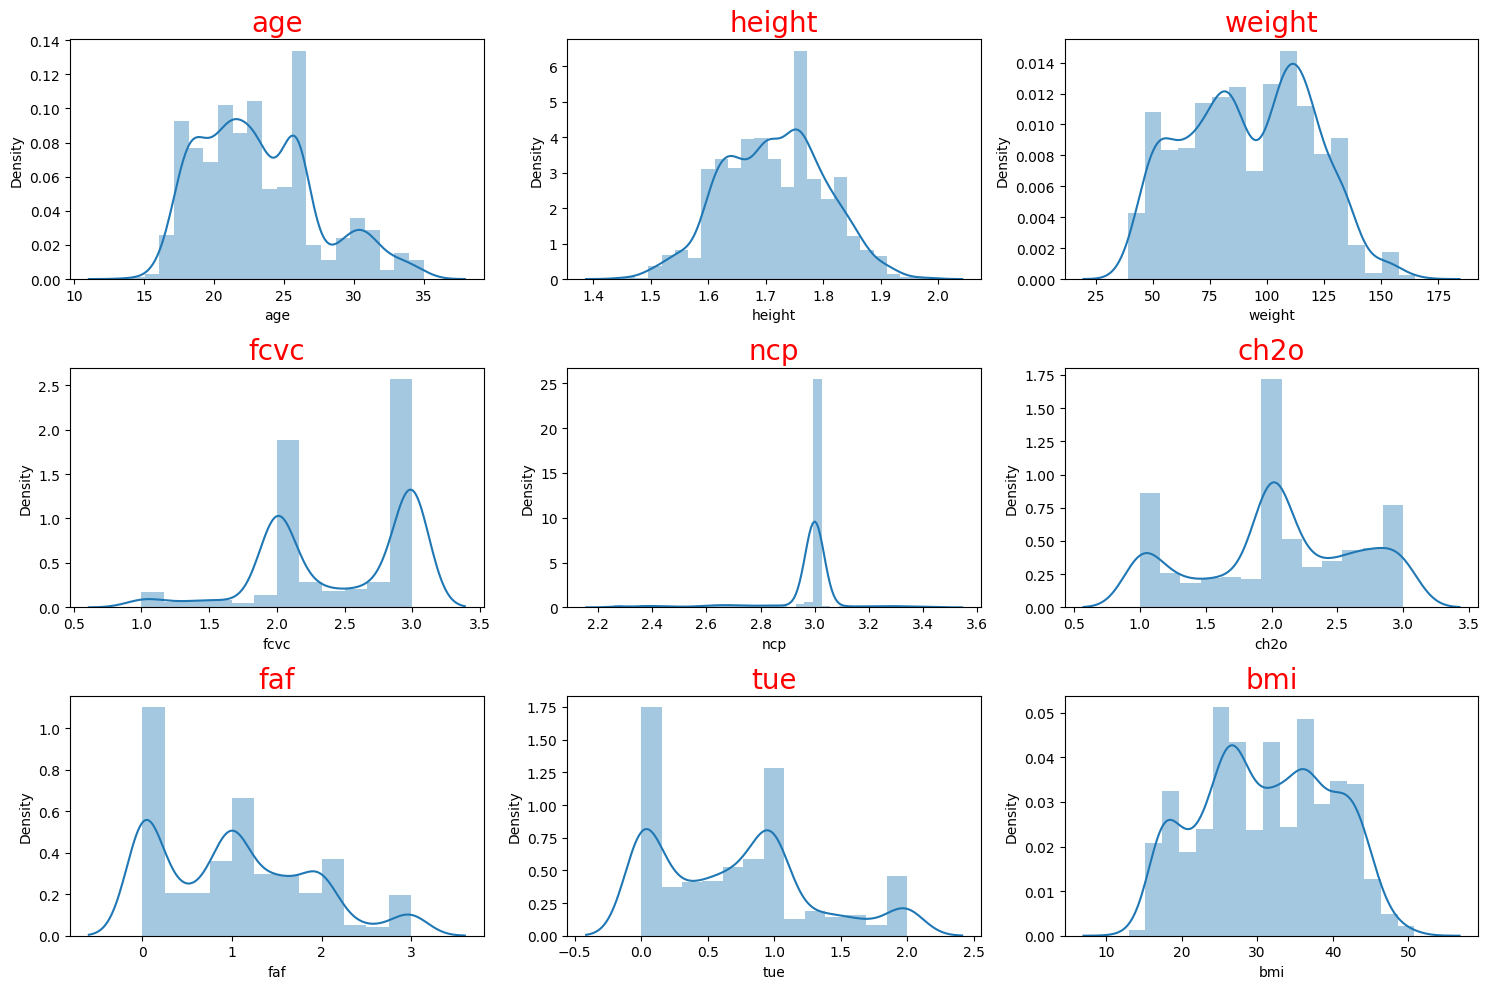

<IPython.core.display.Javascript object>

In [7]:
# Distplot Distribution of Numerical(continues) Variables in Dataset
# Create a figure with a specified size
plt.figure(figsize=(15, 10))

## Enumerate over numeric (non-object) columns in the DataFrame
for number, name in enumerate(df_nature.select_dtypes(exclude="object").columns):
    # Create subplots in a grid format
    axs = plt.subplot(3,3,number + 1,)

    # Create a boxplot for the current numeric column
    sns.distplot(df_nature[name])

    # Set the title for the current subplot
    plt.title(name, color="r", fontsize=20)

    # Ensure tight layout to prevent overlapping subplots
    plt.tight_layout()

# Show the entire plot
plt.show()

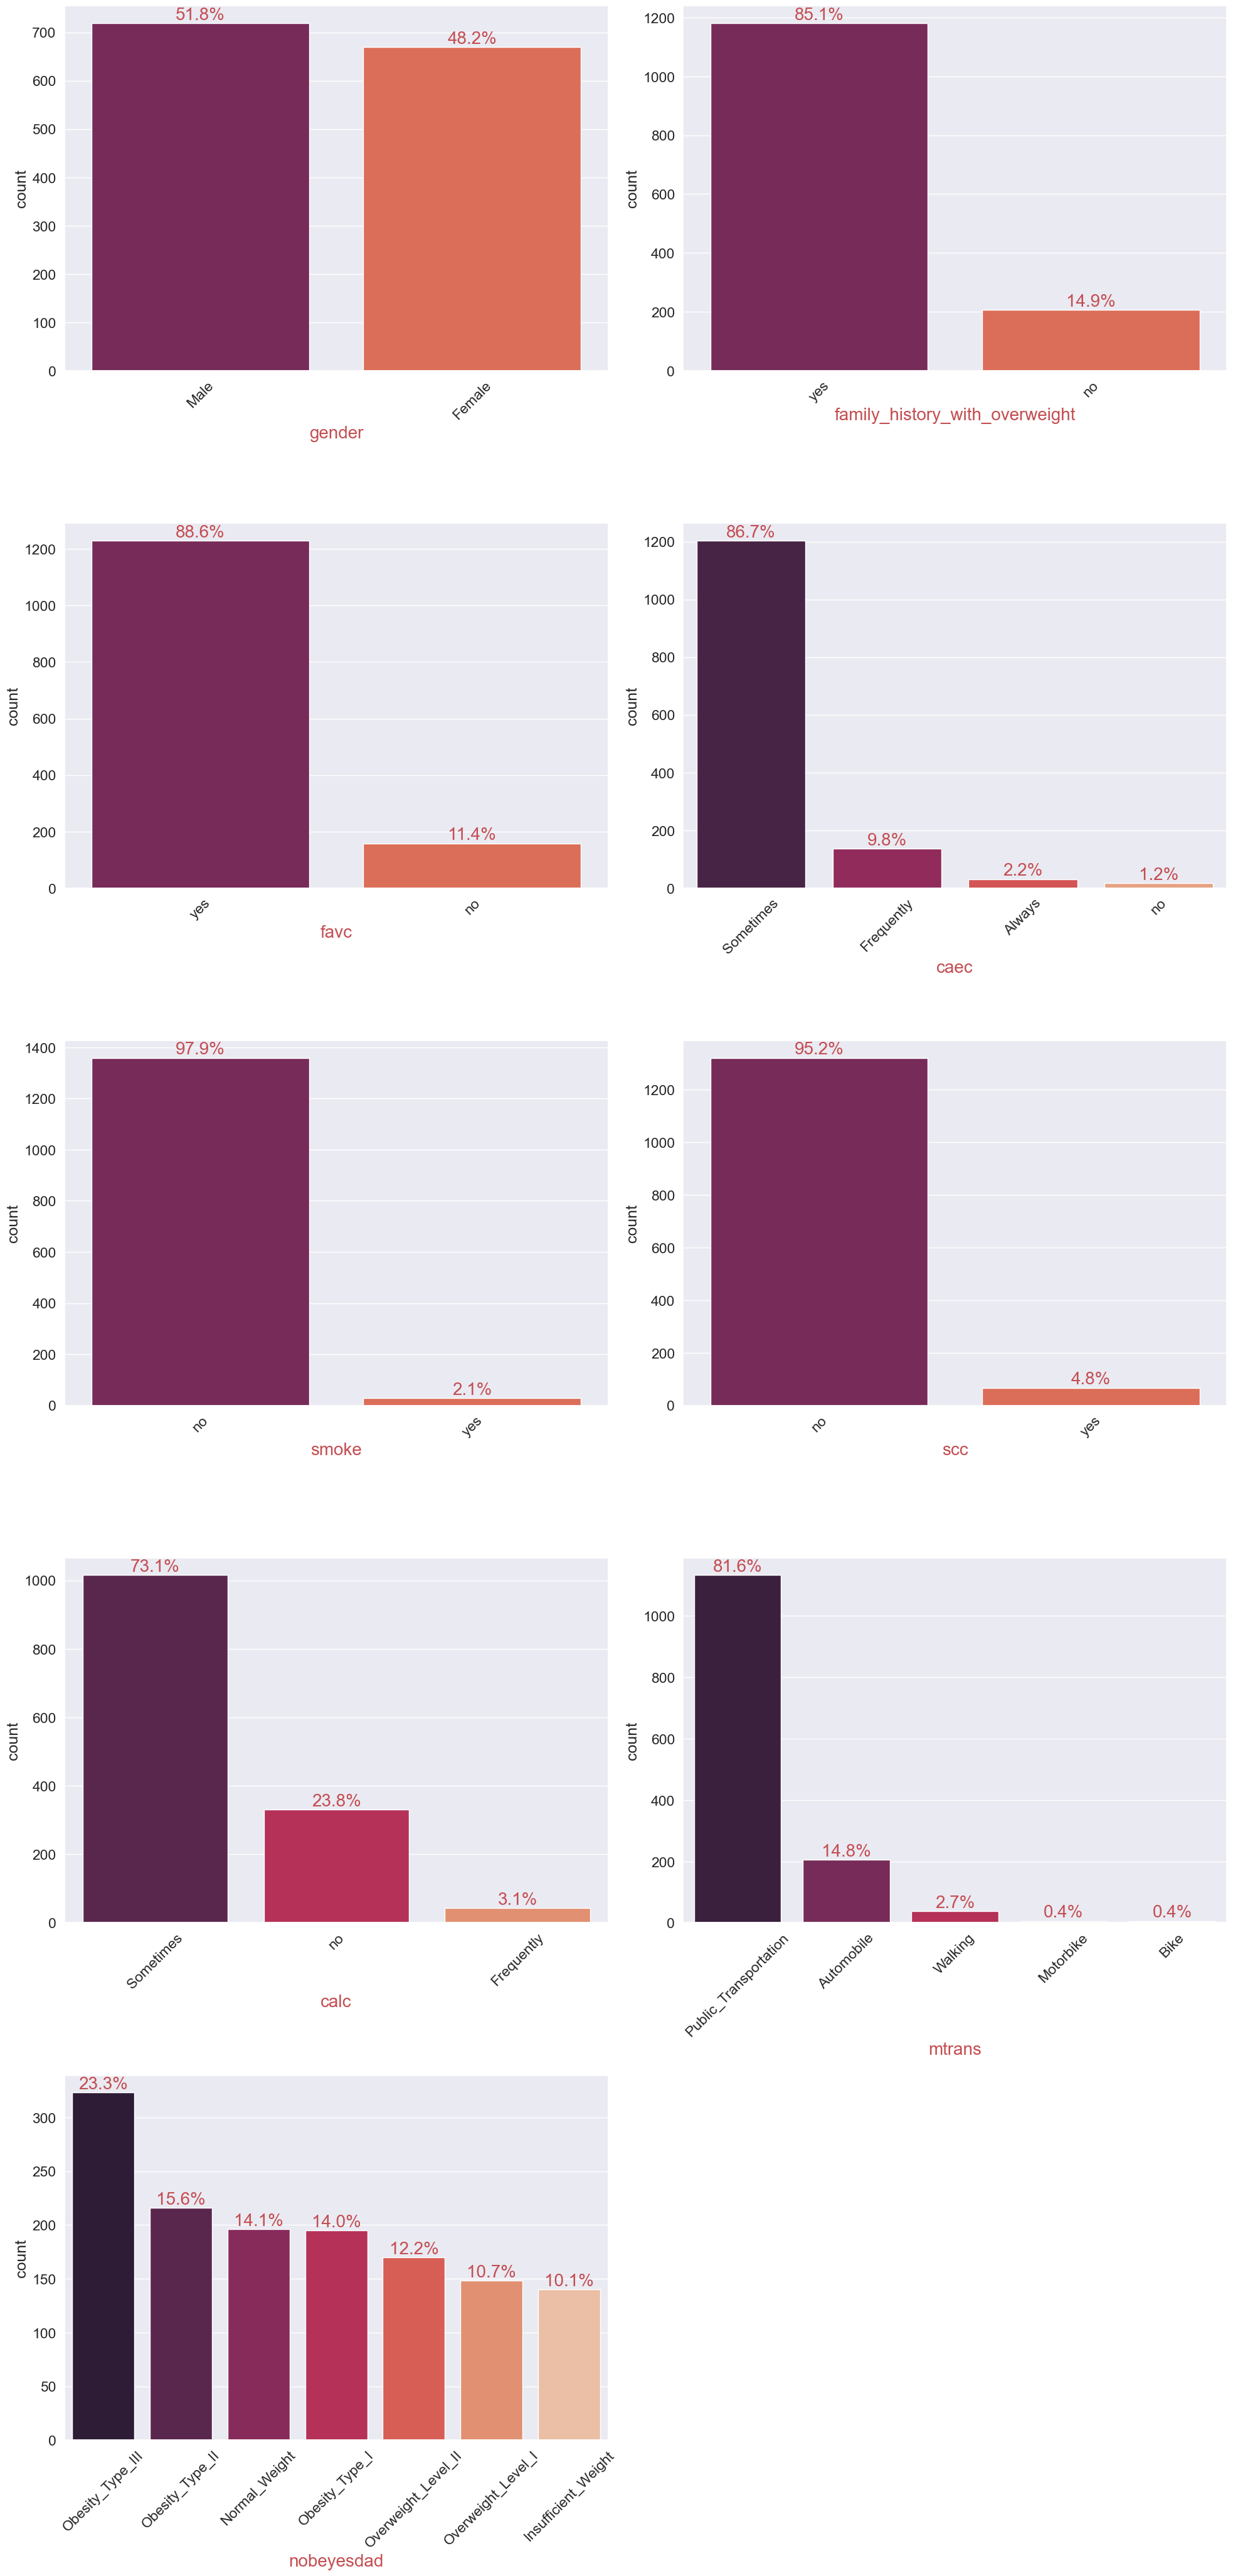

<IPython.core.display.Javascript object>

In [8]:
# Set the overall font size for the plot
sns.set(font_scale=1.5)  

# Create a figure with a specified size
plt.figure(figsize=(20, 40))

# Enumerate over numeric (non-object) columns in the DataFrame
for number, name in enumerate(df_nature.select_dtypes(include="object").columns):
    # Create subplots in a grid format
    axs = plt.subplot(5, 2, number + 1)

    # Create a countplot for the current categorical column
    sns.countplot(x=df_nature[name], order=df_nature[name].value_counts().index, palette="rocket")

    # Set x label for the current subplot
    plt.xlabel(name,fontsize=20,color='r')

    # Calculate and annotate percentages on top of the bars
    for p in axs.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_nature[name]))
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        axs.annotate(percentage, (x, y), fontsize=20 ,color='r',ha='center',va='bottom')

    # Ensure tight layout to prevent overlapping subplots
    plt.tight_layout()
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

# Show the entire plot
plt.show()


 <a id="1"></a>
# <div style="text-align: center; background-color: #569db3; color: white; padding: 14px; line-height: 1;border-radius:20px">1- Obesity Rate (KPIs)</div>

# `1- Calculate the percentage of males and females in each Obesity  Level (underweight, normal, overweight, obese) to understand the obesity rate within the dataset.`

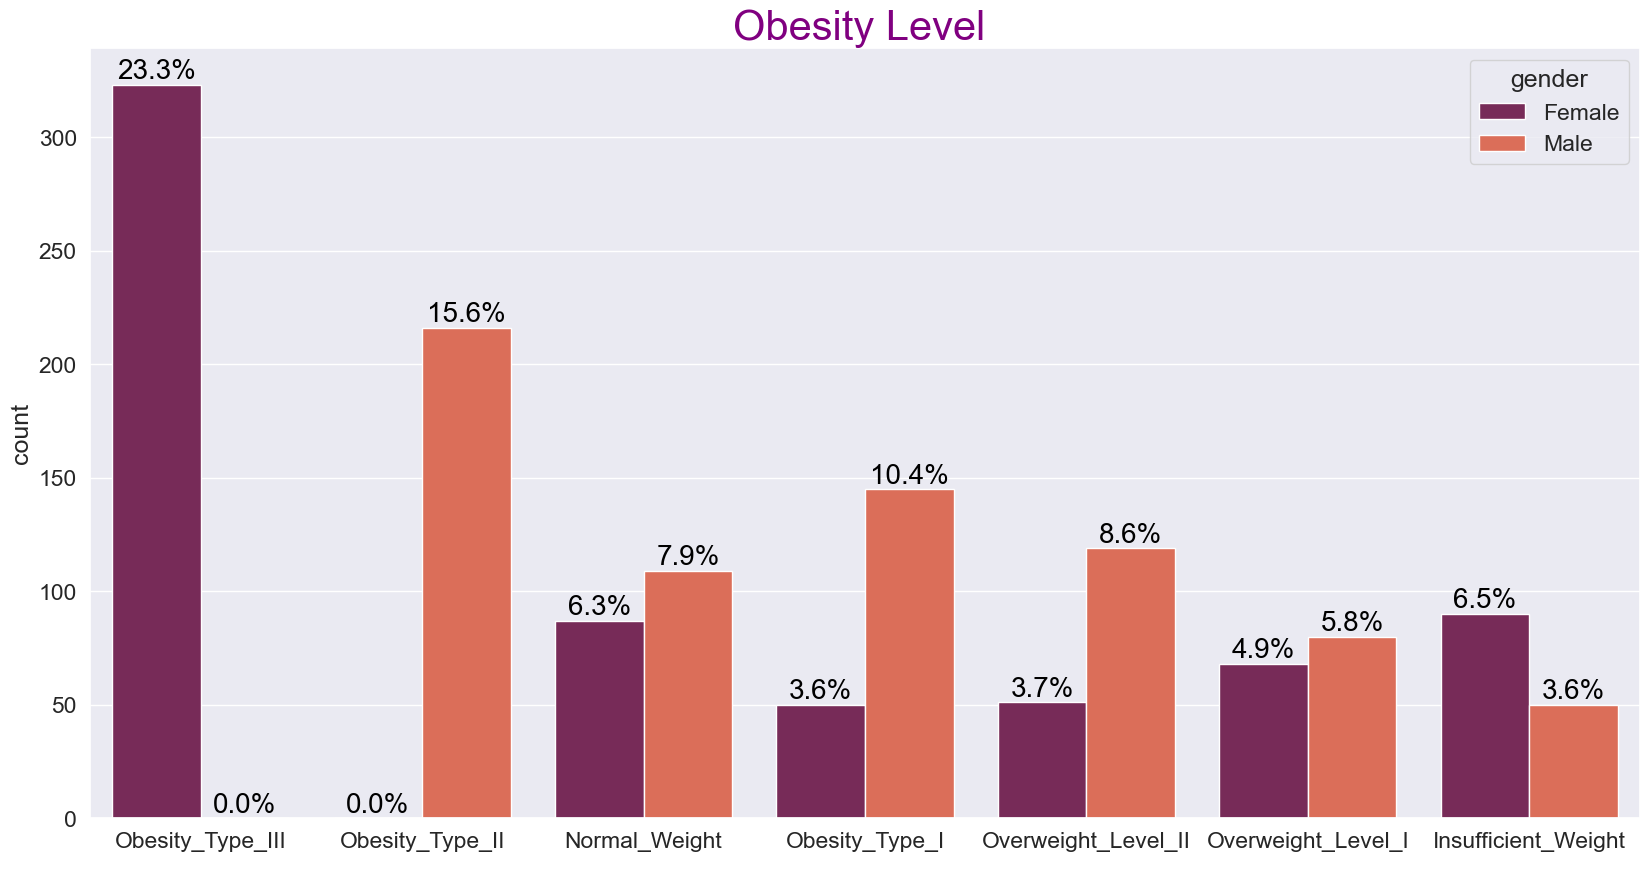

<IPython.core.display.Javascript object>

In [9]:
# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Create a countplot
axs = sns.countplot(x=df_nature["nobeyesdad"],order=df_nature["nobeyesdad"].value_counts().index,palette="rocket",hue=df_nature["gender"])

# Calculate and annotate percentages on top of the bars
for p in axs.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / len(df_nature["nobeyesdad"]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs.annotate(percentage, (x, y), fontsize=20, color="black", ha="center", va="bottom")

# Set the title for the figure
plt.title('Obesity Level ',fontsize=30,color='purple')
# Set x label for the figure
plt.xlabel(" ")

# Show the entire plot
plt.show()

# `Bivariate analysis between target ( obesity level ) and for each  features`

**`Analyze the distribution of Body Mass Index (BMI) categories (underweight, normal weight, overweight, obese) within the dataset.`**

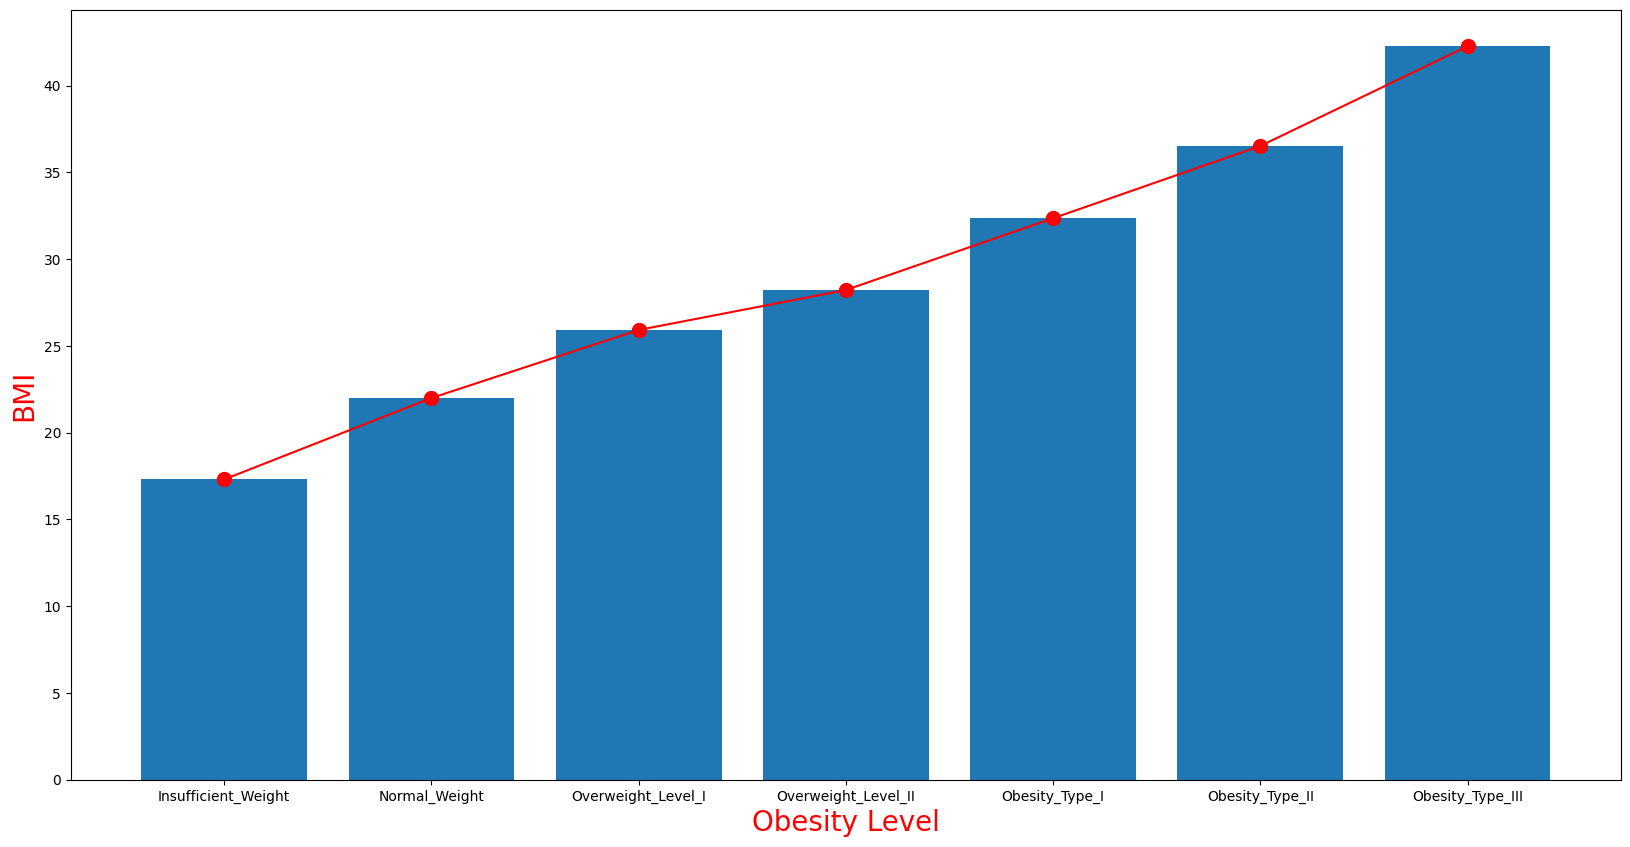

<IPython.core.display.Javascript object>

In [4]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Calculate the mean of the "ncp" column
bmi_mean = df_nature.groupby("nobeyesdad")["bmi"].mean()

# Define the desired order for the bars
order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]

# Reorder the data based on the specified order
bmi_mean = bmi_mean.reindex(order)

# Line plot and bar plot
plt.plot(bmi_mean.index, bmi_mean.values, marker="o", color="r", markersize=10)
axs = plt.bar(bmi_mean.index, bmi_mean.values)

# Set x && y label
plt.xlabel("Obesity Level", fontsize=20, color="r")
plt.ylabel("BMI", fontsize=20, color="r")

# Display the plot
plt.show()

In [166]:
df_nature

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
0,Female,21.00,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.00,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.00,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.00,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I,26.9
5,Male,29.00,1.62,53.00,no,yes,2.0,3.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Automobile,Normal_Weight,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0


<IPython.core.display.Javascript object>

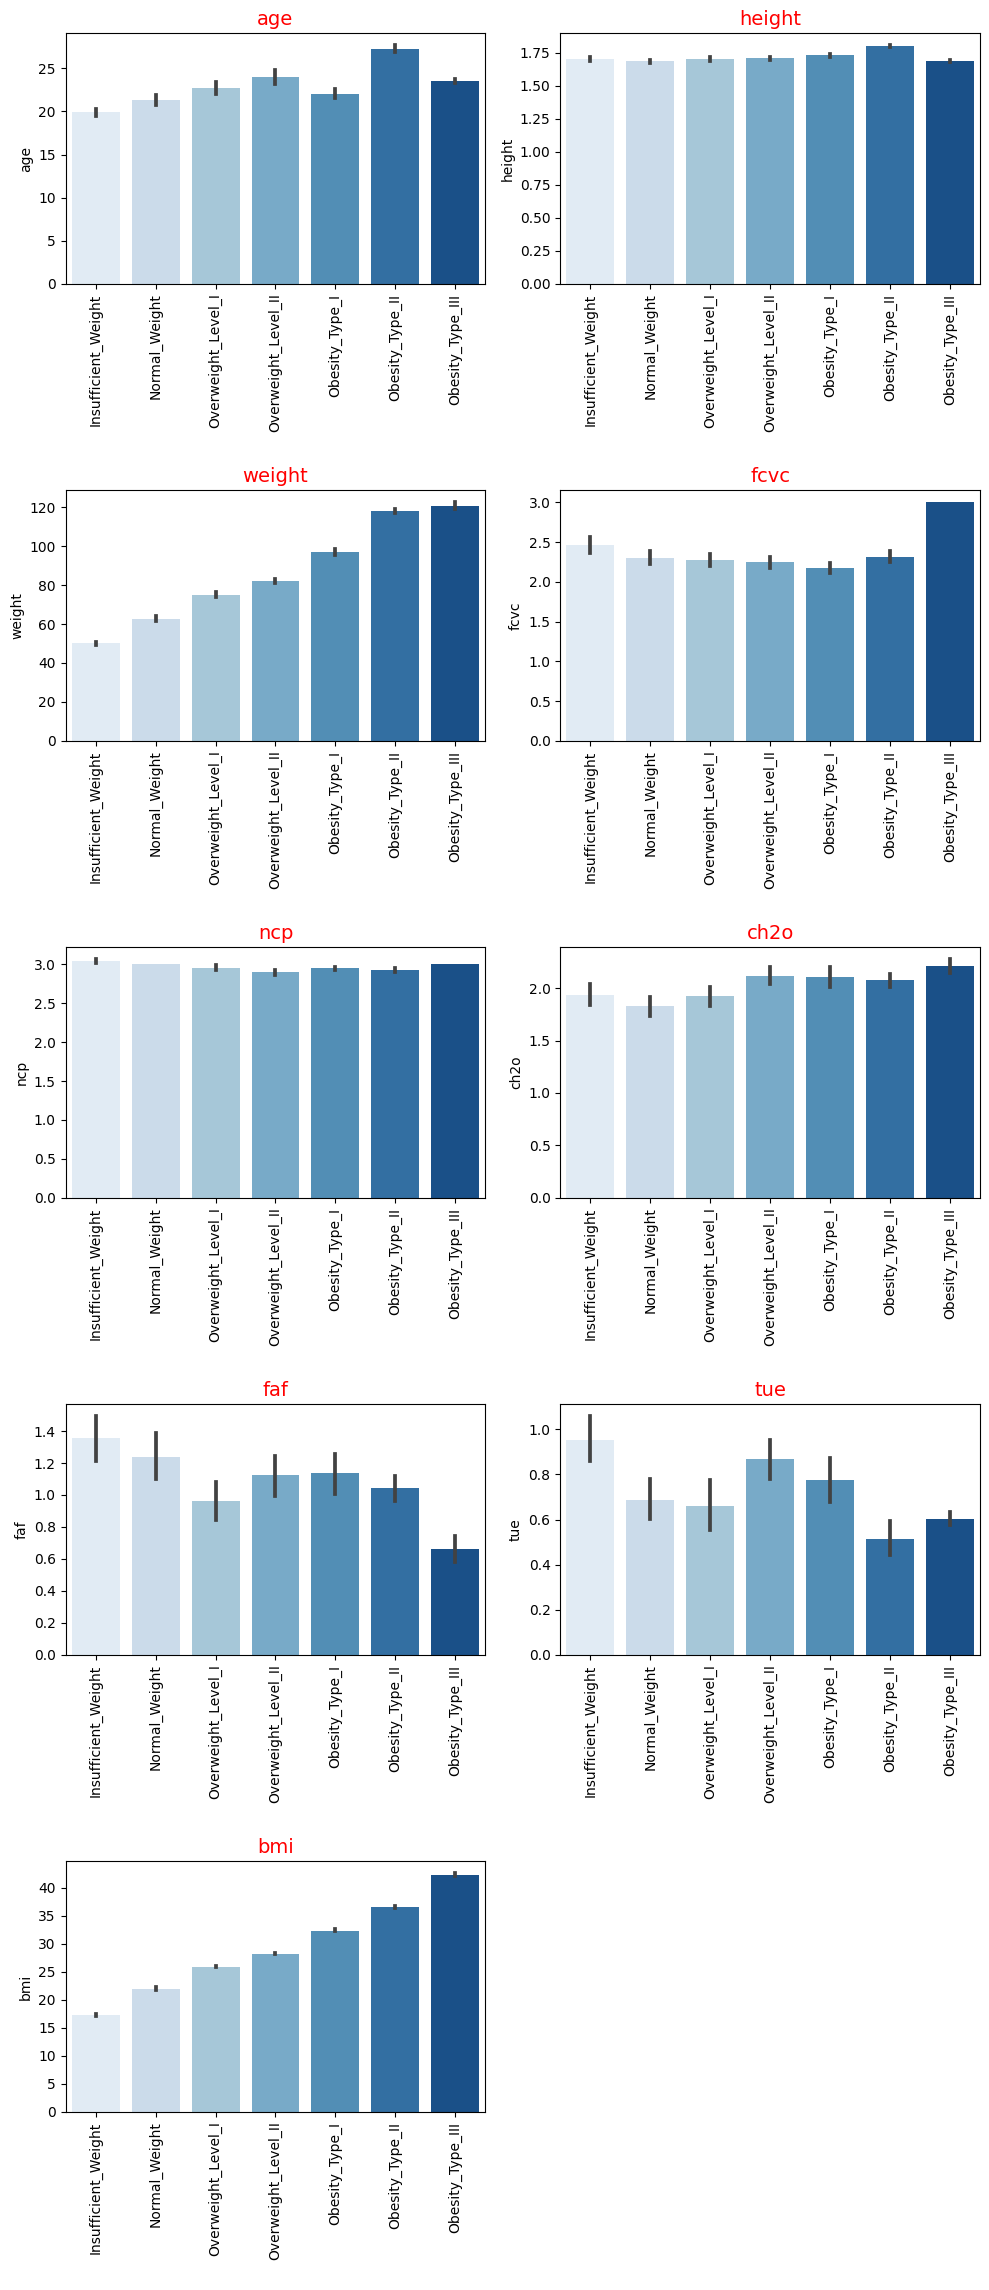

<IPython.core.display.Javascript object>

In [162]:
# Define the order of categories for the "nobeyesdad" column
order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]

# Create a figure for the plots with a specific size
plt.figure(figsize=(10, 23))

# Loop through numerical columns in the DataFrame "df_nature"
for num, name in enumerate(df_nature.select_dtypes(exclude="object")):
    # Create subplots in a 5x2 grid
    axs = plt.subplot(5, 2, num + 1)
    
    # Create a bar plot using seaborn, specifying data, x-axis ("nobeyesdad"), y-axis (current numerical column),
    # color palette ("viridis"), and order of categories
    plot = sns.barplot(data=df_nature, x="nobeyesdad", y=name, palette="Blues", order=order)
    
    # Set the title for the subplot
    plt.title(name, fontsize=14, color="r")
    
    # Set the x-axis label to empty
    plt.xlabel(" ")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the plots
plt.show()


**`New obestiy level (obesity && Normal weight && insufficient weight)`**

In [8]:
## Calculat persntage for each categorical in new obestiy level
print(f'Persantage of obesity = {df_nature["nobeyesdad"].value_counts(normalize=True)[:2].sum()+df_nature["nobeyesdad"].value_counts(normalize=True)[3:-1:4].sum() :.2f}')
print(f'Persantage of Over weight = {df_nature["nobeyesdad"].value_counts(normalize=True)[4:6].sum():.2f}')
print(f'Persantage of Normal weight = {df_nature["nobeyesdad"].value_counts(normalize=True)[2]:.2f}')
print(f'Persantage of insufficient weight = {df_nature["nobeyesdad"].value_counts(normalize=True)[-1]:.2f}')

Persantage of obesity = 0.53
Persantage of Over weight = 0.23
Persantage of Normal weight = 0.14
Persantage of insufficient weight = 0.10


<IPython.core.display.Javascript object>

# `Problems`
**1- High obesity rate , which represents (53%)**</br>
**2-Low percentage of normal weight, which represents (14%)**</br>
**3-High insufficient weight rate , which represents (10%)**</br>
**4-Increased rate of overweight , which represents (23%)**</br>


In [9]:
df_nature

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
0,Female,21.00,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.00,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.00,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.00,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I,26.9
5,Male,29.00,1.62,53.00,no,yes,2.0,3.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Automobile,Normal_Weight,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0


<IPython.core.display.Javascript object>

# `1- Solution higher obesity rate problem`

In [42]:
### Data that include higher obesity rate
df_obesity = df_nature[
    df_nature["nobeyesdad"].isin(
        ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
    )
]
df_obesity.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,30.7
67,Male,23.0,1.65,95.0,yes,yes,2.0,3.0,Always,no,2.0,no,0.0,1.0,Frequently,Automobile,Obesity_Type_I,34.9
68,Male,30.0,1.76,112.0,yes,yes,1.0,3.0,no,yes,2.0,yes,0.0,0.0,Frequently,Automobile,Obesity_Type_II,36.2
78,Female,23.0,1.65,90.0,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_I,33.1
82,Male,23.0,1.67,85.5,yes,yes,2.0,3.0,Always,no,2.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_I,30.7


<IPython.core.display.Javascript object>

In [11]:
### shape of data
df_obesity.shape

(734, 18)

<IPython.core.display.Javascript object>

In [12]:
## Map fcvc
map_fcvc = {1: "never", 2: "sometimes", 3: "always"}
df_obesity.fcvc = round(df_obesity.fcvc)
df_obesity.fcvc = round(df_obesity.fcvc).map(map_fcvc)
df_obesity.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
10,Male,26.0,1.85,105.0,yes,yes,always,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I,30.7
67,Male,23.0,1.65,95.0,yes,yes,sometimes,3.0,Always,no,2.0,no,0.0,1.0,Frequently,Automobile,Obesity_Type_I,34.9
68,Male,30.0,1.76,112.0,yes,yes,never,3.0,no,yes,2.0,yes,0.0,0.0,Frequently,Automobile,Obesity_Type_II,36.2
78,Female,23.0,1.65,90.0,yes,yes,sometimes,3.0,Sometimes,no,3.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_I,33.1
82,Male,23.0,1.67,85.5,yes,yes,sometimes,3.0,Always,no,2.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_I,30.7


<IPython.core.display.Javascript object>

# `Factors that affect the increase in obesity`

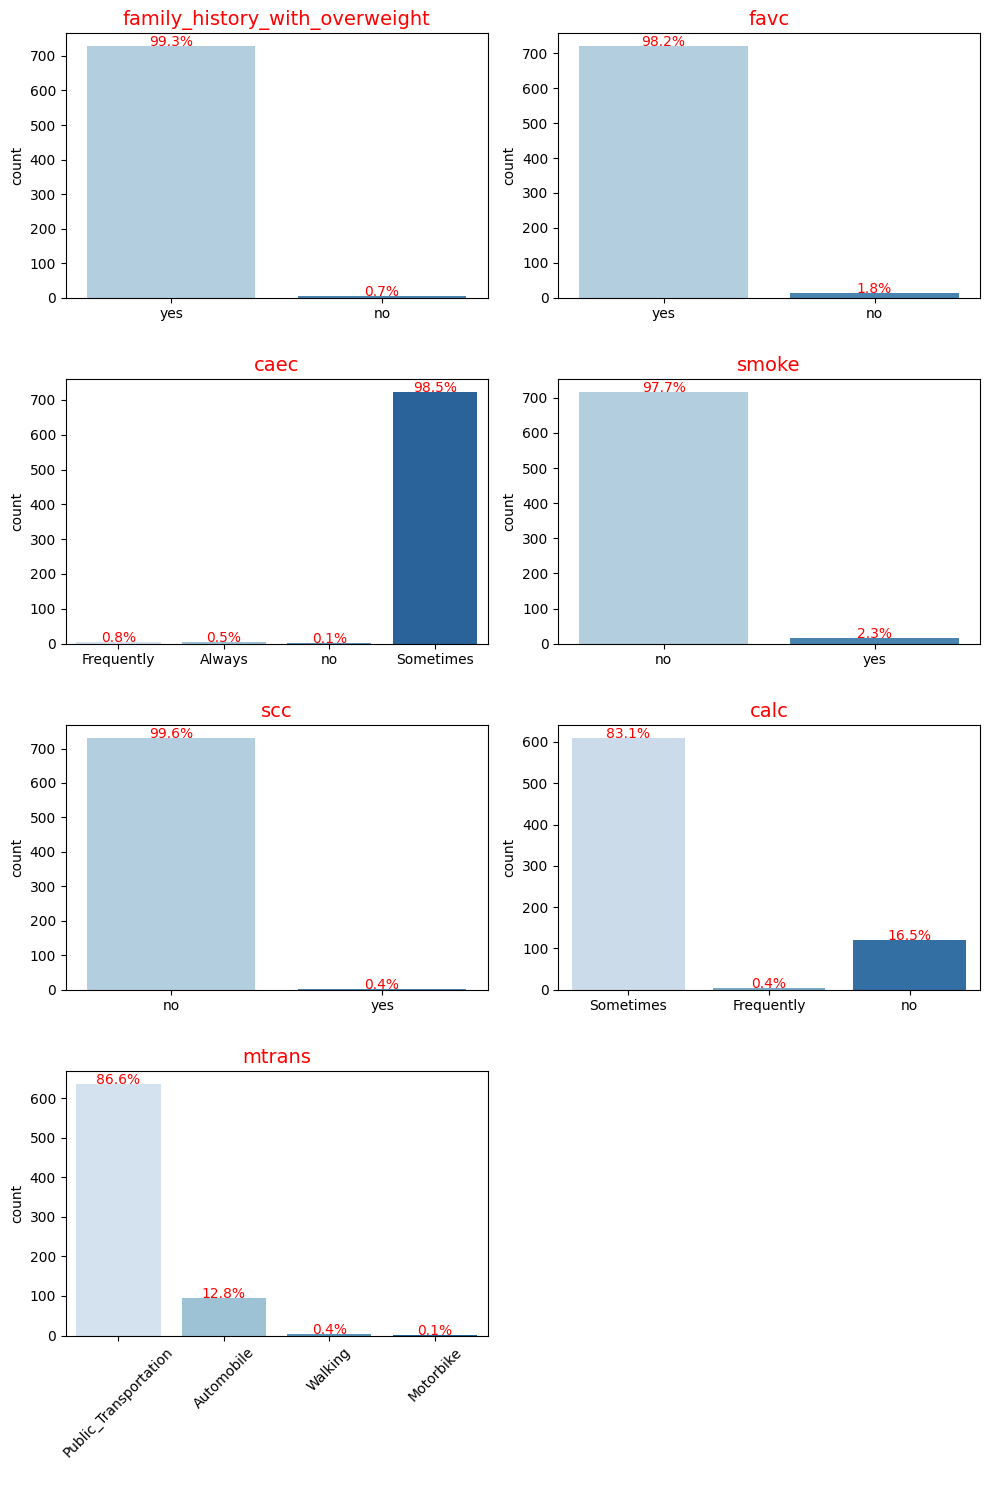

<IPython.core.display.Javascript object>

In [163]:
# Create a figure for the plots with a specific size
plt.figure(figsize=(10, 15))

# Loop through categorical columns in the DataFrame "df_obesity"
for num, name in enumerate(df_obesity.select_dtypes(include="object").iloc[:, 1:-1].columns):
    # Create subplots in a 4x2 grid
    axs = plt.subplot(4, 2, num + 1)
    
    # Create a countplot using seaborn, specifying the data, x-axis (current categorical column), and color palette ('viridis')
    plot = sns.countplot(x=df_obesity[name], palette='Blues')
    
    # Set the title for the subplot
    plt.title(name, fontsize=14, color='r')
    
    # Set the x-axis label to empty
    plt.xlabel(' ')
    
    # Add percentage labels above each bar in the plot
    for p in plot.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / len(df_obesity))
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', color='r', fontsize=10)
    
    # Rotate x-axis labels if the column name is 'mtrans' for better readability
    if name == 'mtrans':
        plt.xticks(rotation=45)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the plots
plt.show()


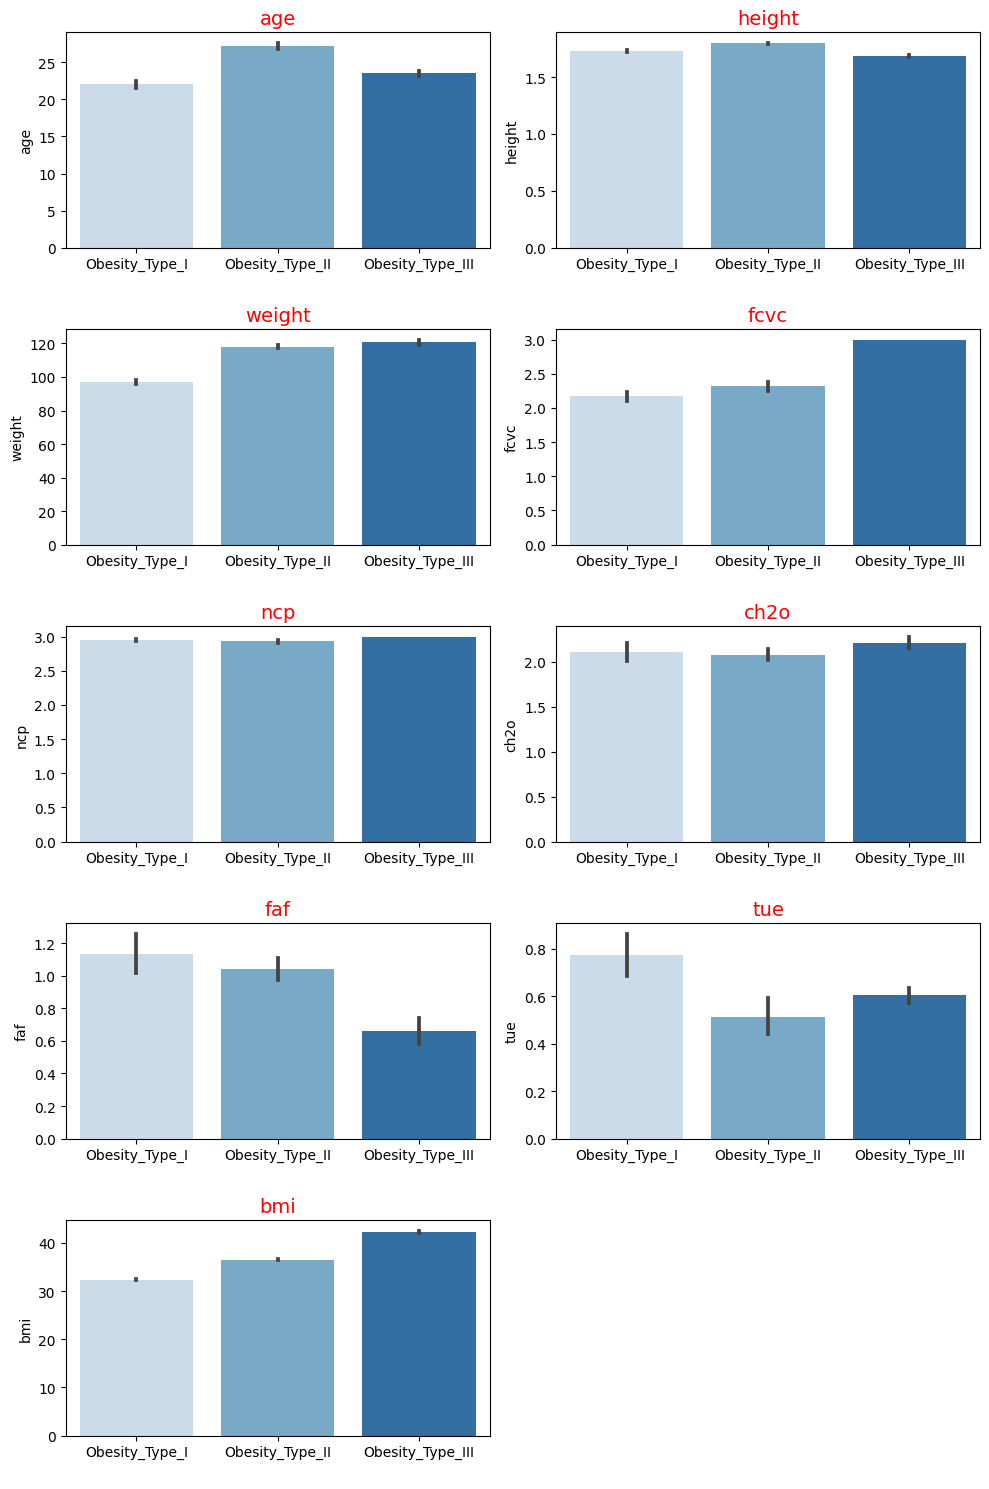

<IPython.core.display.Javascript object>

In [164]:
# Create a figure for the plots with a specific size
plt.figure(figsize=(10, 15))

# Loop through numerical columns in the DataFrame "df_obesity"
for num, name in enumerate(df_obesity.select_dtypes(exclude="object")):
    # Create subplots in a 5x2 grid
    axs = plt.subplot(5, 2, num + 1)
    
    # Create a barplot using seaborn, specifying the data, x-axis ('nobeyesdad'), y-axis (current numerical column), and color palette ('viridis')
    plot = sns.barplot(data=df_obesity, x='nobeyesdad', y=name, palette='Blues')
    
    # Set the title for the subplot
    plt.title(name, fontsize=14, color='r')
    
    # Set the x-axis label to empty
    plt.xlabel(' ')
    
    
    # Rotate x-axis labels if the column name is 'mtrans' for better readability
    if name == 'mtrans':
        plt.xticks(rotation=45)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the plots
plt.show()


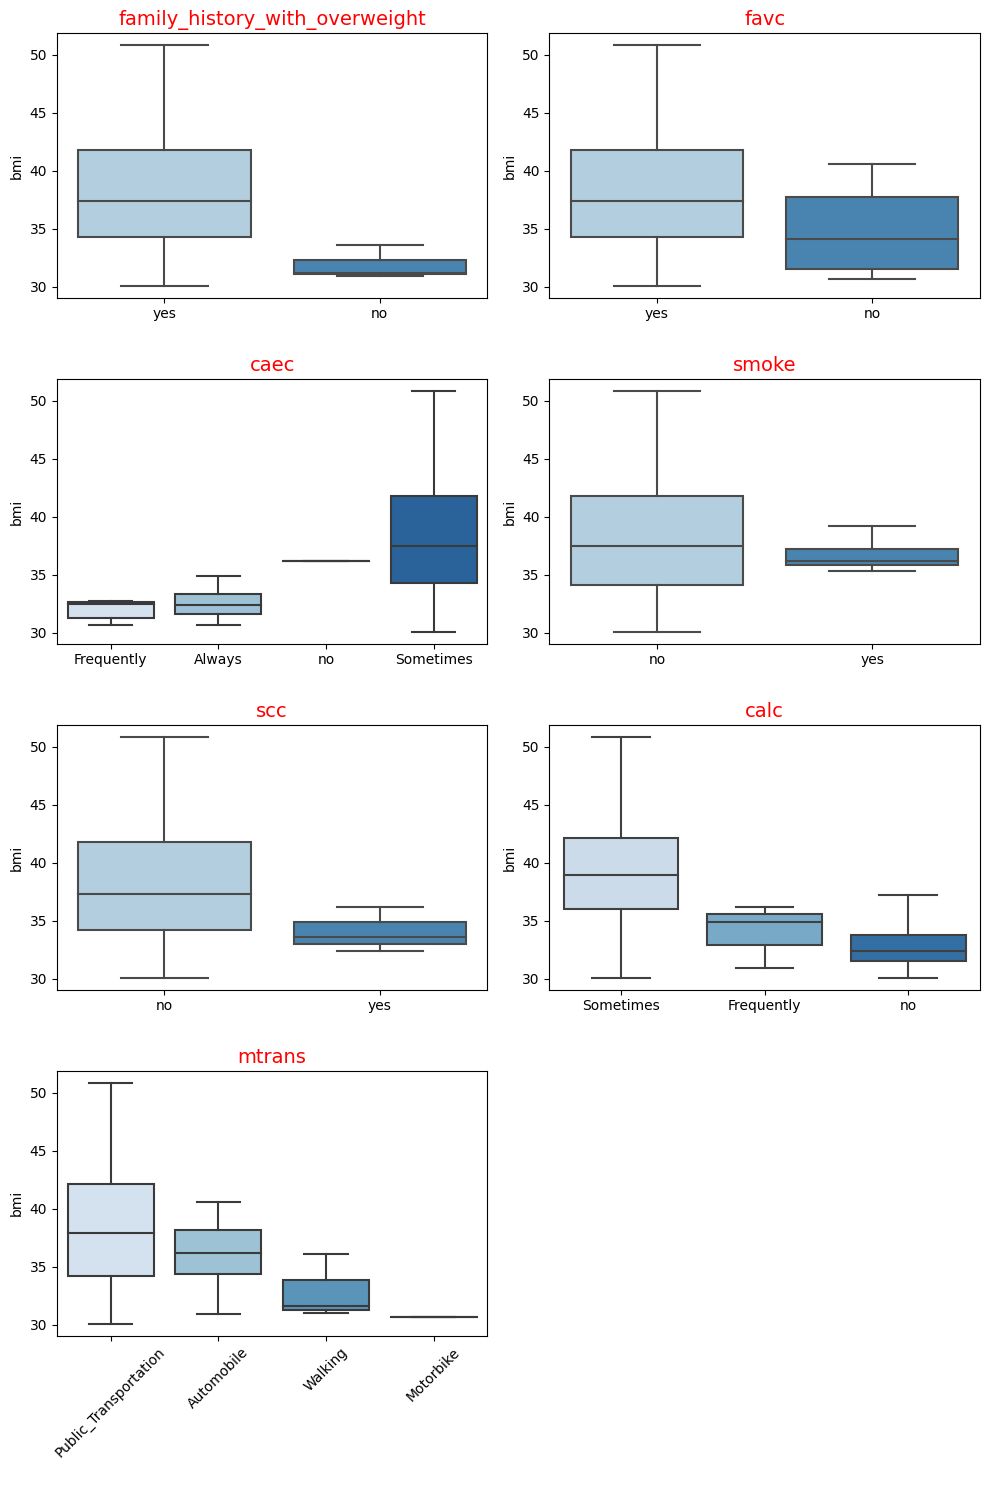

<IPython.core.display.Javascript object>

In [165]:
# Create a figure for the plots with a specific size
plt.figure(figsize=(10, 15))

# Loop through categorical columns (excluding the first and last) in the DataFrame "df_obesity"
for num, name in enumerate(df_obesity.select_dtypes(include="object").iloc[:, 1:-1].columns):
    # Create subplots in a 4x2 grid
    axs = plt.subplot(4, 2, num + 1)
    
    # Create a boxplot using seaborn, specifying the data, x-axis (current categorical column), y-axis ('bmi'),
    # color palette ('viridis'), and showfliers=False to exclude outliers from the plot
    plot = sns.boxplot(data=df_obesity, x=name, y=df_obesity["bmi"], palette='Blues', showfliers=False)
    
    # Set the title for the subplot
    plt.title(name, fontsize=14, color='r')
    
    # Set the x-axis label to empty
    plt.xlabel(' ')
    
    # Rotate x-axis labels if the column name is 'mtrans' for better readability
    if name == 'mtrans':
        plt.xticks(rotation=45)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Display the plots
plt.show()


# `Factors that affect the increase in obesity rate`
**`1- Family history with overweight	`**</br>
**`2- Frequent consumption of high caloric food`**</br>
**`3- Not monitoring calorie consumption `**</br>
**`3- Increased rate of alcohol consumption `**</br>
**`4- The lack of widespread walking as a means of transportation`**</br>
**`5- Low frequency of physical activity`**</br>
**`6- Increased number of main meals`**</br>

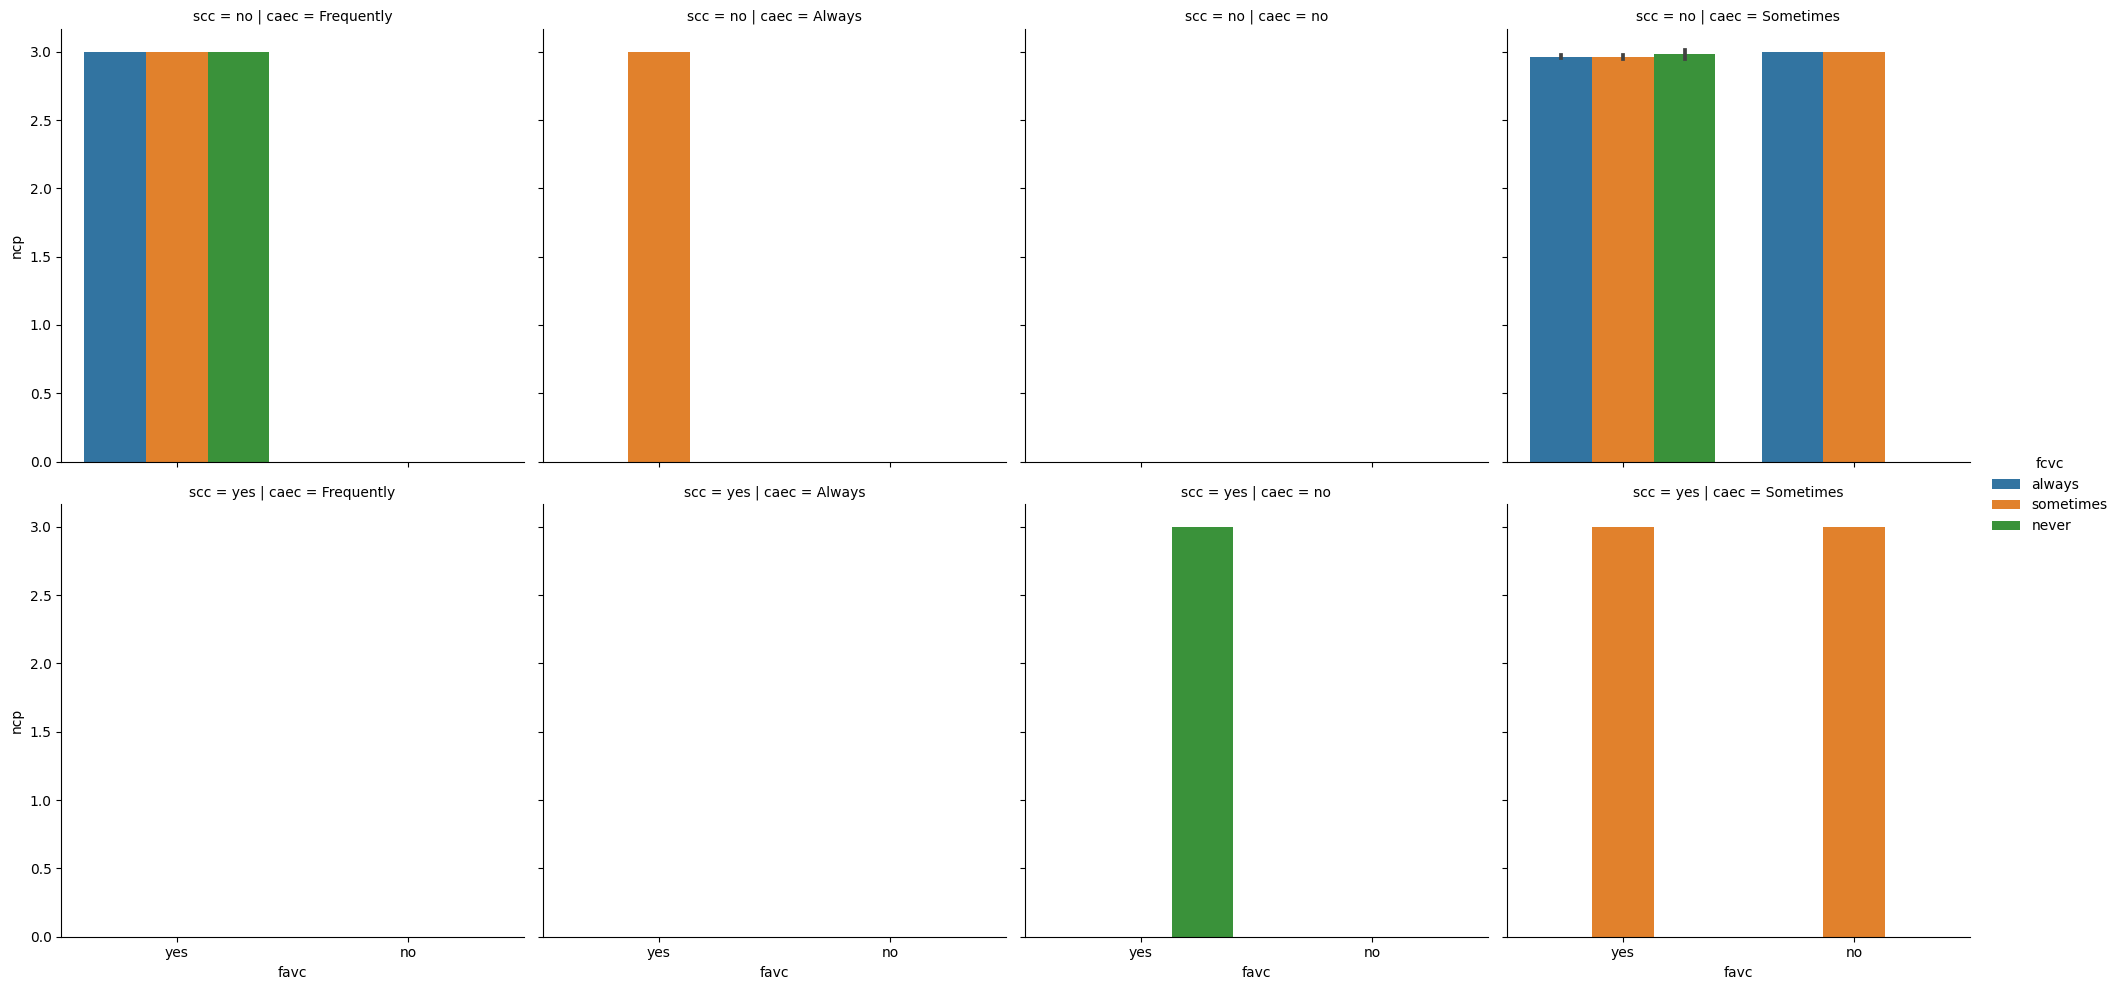

<IPython.core.display.Javascript object>

In [15]:
sns.catplot(kind="bar", data=df_obesity, x="favc", y="ncp", hue="fcvc", col="caec",row='scc')

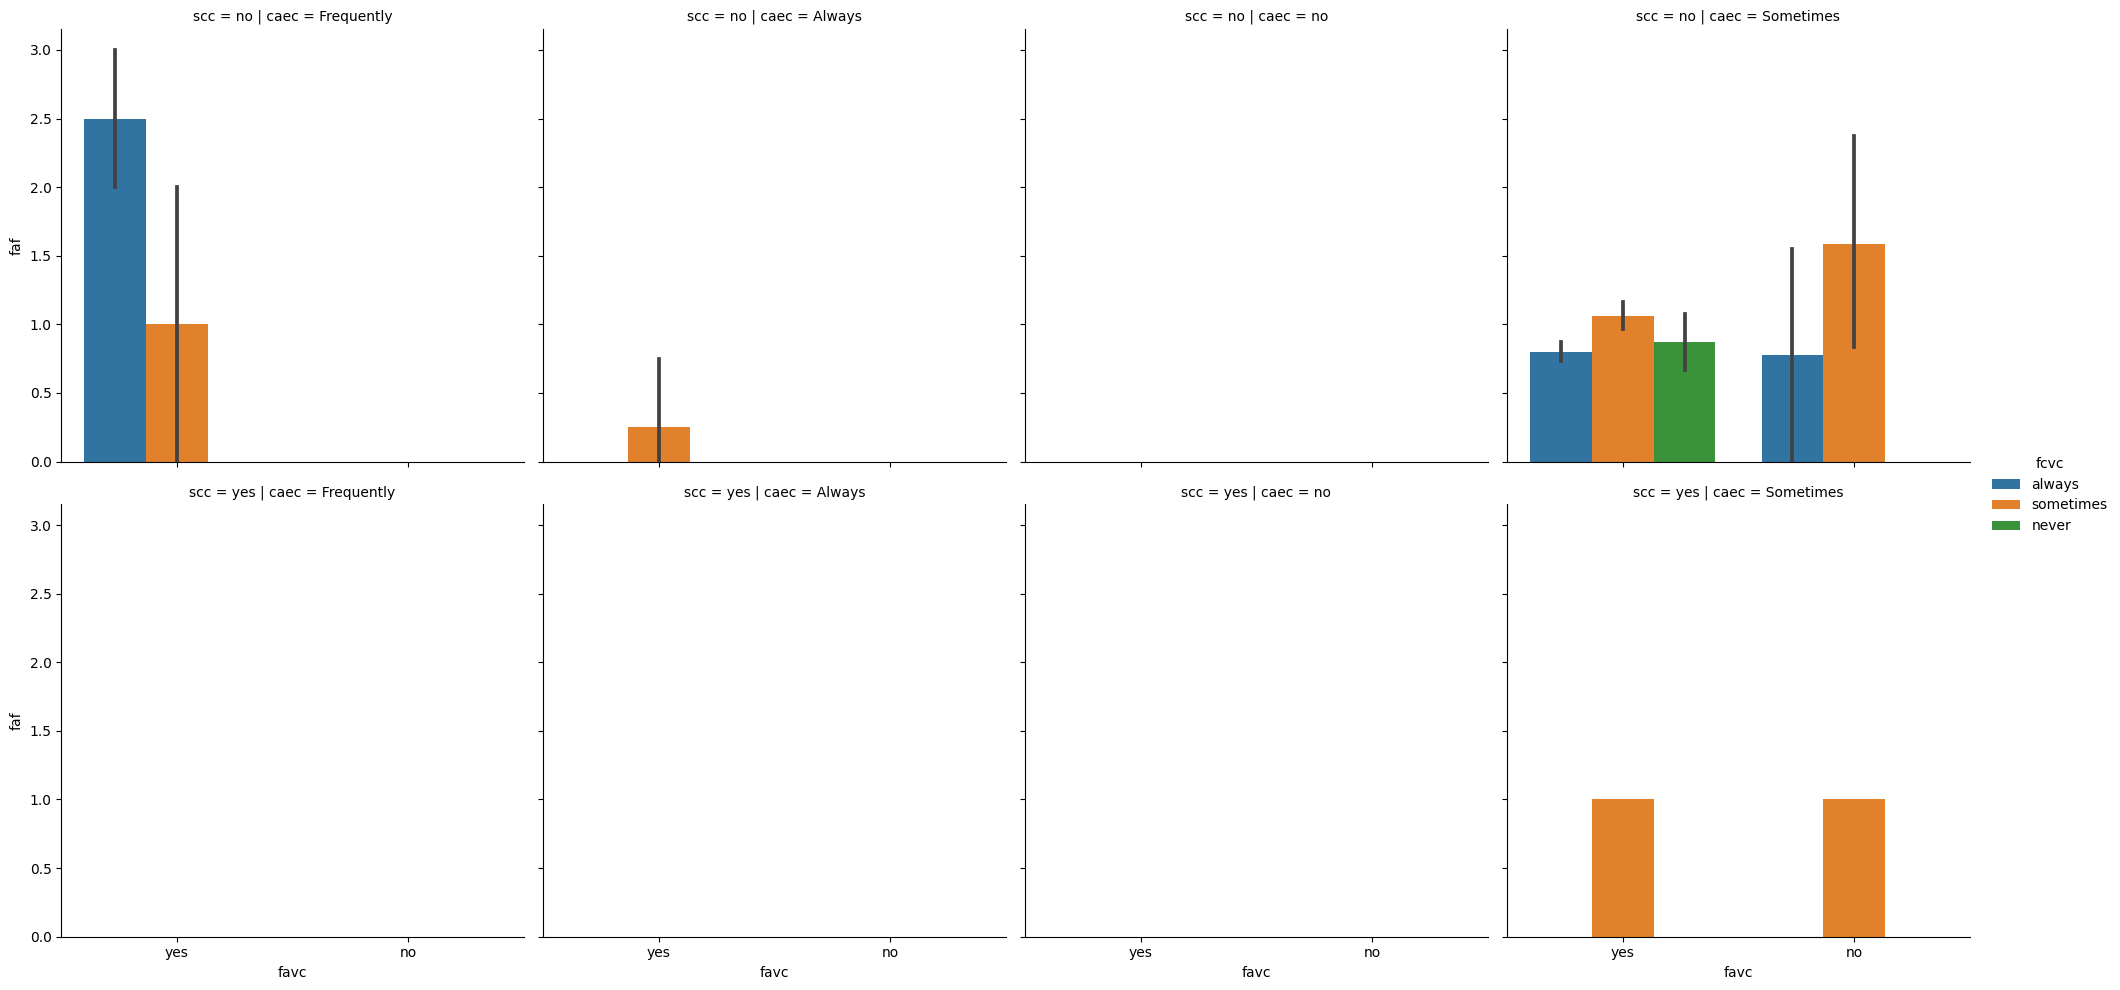

<IPython.core.display.Javascript object>

In [16]:
sns.catplot(kind="bar", data=df_obesity, x="favc", y="faf", hue="fcvc", col="caec",row='scc')

# `Problem 1`
**`After studying a group of people suffering from obesity, it was found that they monitor their calorie consumption, yet they suffer from obesity for the following reasons:`**
* 1- Frequent consumption of high caloric food (FAVC) </br>
* 2- Increased number of main meals (NCP) </br>
* 3- Low frequency of physical activity (FAF)</br>
* 4- NO consumption of food between meals (CAEC)</br>
* 5- No consumption of vegetables in eat (FCVC)</br>
# `The proposed solution to solve this problem`
* 1- Reduce frequent consumption of high caloric food (FAVC)</br>
* 2- reduce number of main meals (NCP)</br>
* 3- Increased consumption of vegetables in eat (FCVC)</br>
* 4- Increased frequency of physical activity (FAF)</br>

**********************************

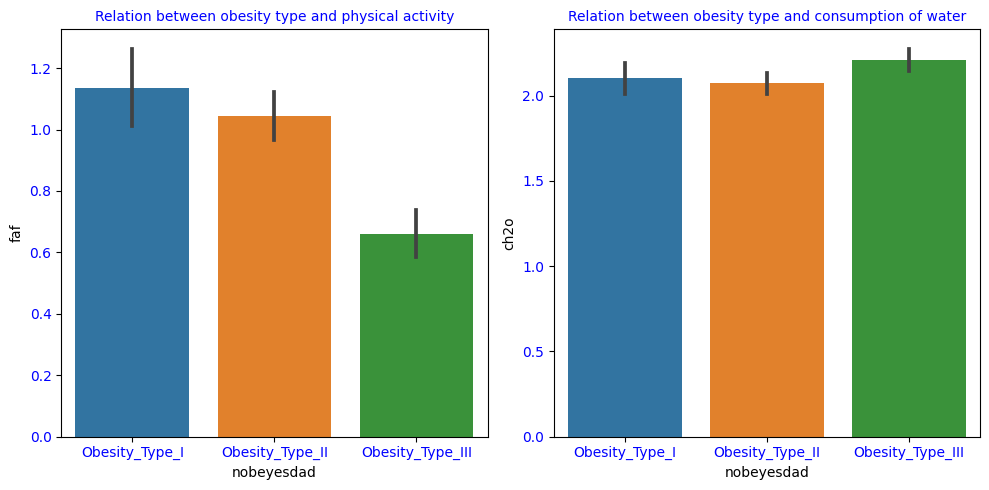

<IPython.core.display.Javascript object>

In [66]:
# Create a figure for the plots with a specific size
plt.figure(figsize=(10, 5))

# Loop through two columns ('faf' and 'ch2o')
for num, name in enumerate(['faf', 'ch2o']):
    # Create subplots in a 1x2 grid
    axs = plt.subplot(1, 2, num + 1)
    
    # Create a barplot using seaborn, specifying the data, x-axis ('nobeyesdad'), y-axis (current column 'name'),
    # and the order of categories in the x-axis
    sns.barplot(data=df_obesity, x="nobeyesdad", y=name, order=['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
    
    # Set x-axis tick labels color to blue
    plt.xticks(color='b')
    
    # Set y-axis tick labels color to blue
    plt.yticks(color='b')
    
    # Set the title for the subplot based on the column name
    if name == 'faf':
        plt.title('Relation between obesity type and physical activity', fontsize=10, color='b')
    else:
        plt.title('Relation between obesity type and consumption of water', fontsize=10, color='b')

# Adjust the layout of subplots for better spacing
plt.tight_layout()


---------------------

# `Problem 2`

**`- There is a group of people who do not eat foods that contain high calories, and despite this they suffer from obesity.What is the cause of this problem?`**

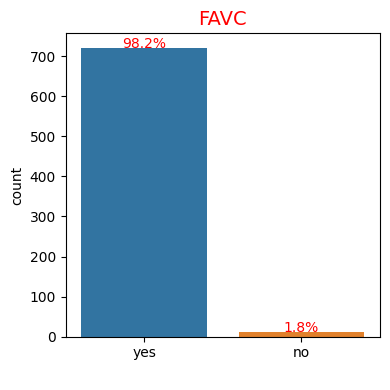

<IPython.core.display.Javascript object>

In [69]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(4, 4))

# Create a countplot using seaborn for the "favc" column
plot = sns.countplot(x=df_obesity["favc"])

# Add percentage labels above each bar in the plot
for p in plot.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / len(df_obesity))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha="center", color="r", fontsize=10)

# Set the title for the plot
plt.title("FAVC", fontsize=14, color="r")

# Set the x-axis label to empty
plt.xlabel(" ")

# Adjust the layout of the plot for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# `Problem 2`
* **`There is a group of people who do not eat foods that contain high calories, and despite this they suffer from obesity.What is the cause of this problem?`**
* 1- They have a family history of being overweight   </br>
* 2- Sometimes food is consumed between meals, with a reduction in physical activity, and a lack of the spread of walking as a means of transportation. </br>
* 3- Increased number of main meals (NCP)

In [19]:
# FAVC Problem (no)
df_obesity[df_obesity.favc == "no"]

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
108,Male,22.00,1.75,95.00,yes,no,sometimes,3.0,Sometimes,no,3.00,no,3.00,2.0,no,Walking,Obesity_Type_I,31.0
165,Male,30.00,1.92,130.00,yes,no,sometimes,3.0,Sometimes,yes,1.00,no,1.00,0.0,Sometimes,Public_Transportation,Obesity_Type_II,35.3
187,Male,25.00,1.78,98.00,yes,no,sometimes,3.0,Sometimes,no,3.00,no,3.00,2.0,no,Public_Transportation,Obesity_Type_I,30.9
203,Male,29.00,1.69,90.00,yes,no,sometimes,3.0,Sometimes,no,3.00,no,1.00,0.0,Sometimes,Automobile,Obesity_Type_I,31.5
225,Male,25.00,1.83,121.00,yes,no,always,3.0,Sometimes,no,3.00,no,2.00,0.0,Sometimes,Walking,Obesity_Type_II,36.1
229,Male,32.00,1.75,120.00,yes,no,always,3.0,Sometimes,no,3.00,no,0.00,2.0,no,Automobile,Obesity_Type_II,39.2
257,Male,19.00,1.85,115.00,no,no,sometimes,3.0,Sometimes,no,3.00,yes,1.00,2.0,no,Public_Transportation,Obesity_Type_I,33.6
383,Male,17.00,1.70,98.00,yes,no,sometimes,3.0,Sometimes,no,2.00,no,0.00,1.0,Sometimes,Automobile,Obesity_Type_I,33.9
388,Male,18.00,1.78,108.00,yes,no,sometimes,3.0,Sometimes,no,3.00,no,1.00,0.0,no,Public_Transportation,Obesity_Type_I,34.1
403,Female,26.00,1.66,112.00,yes,no,always,3.0,Sometimes,no,3.00,no,0.00,0.0,no,Automobile,Obesity_Type_III,40.6


<IPython.core.display.Javascript object>

**`The cause of this problem`**

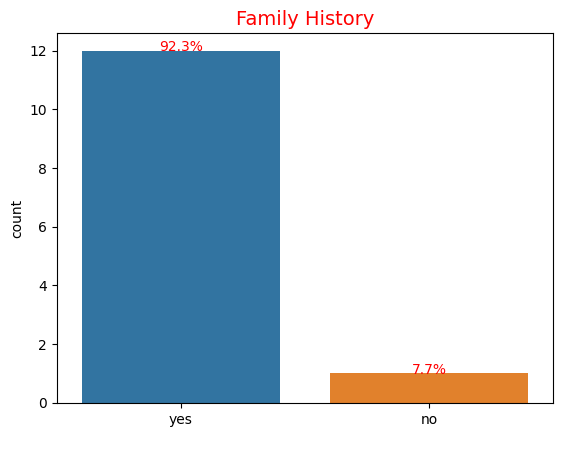

<IPython.core.display.Javascript object>

In [20]:
## Family History
axs=sns.countplot(x=df_obesity[df_obesity.favc == "no"]["family_history_with_overweight"])
for p in axs.patches:
    percentage="{:.1f}%".format(100*p.get_height()/len(df_obesity[df_obesity.favc == "no"]))
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    axs.annotate(percentage,(x,y), ha='center', color='r',fontsize=10)
plt.title('Family History',fontsize=14, color='r')
plt.xlabel(' ')
plt.show()

<Axes: xlabel='ncp', ylabel='Density'>

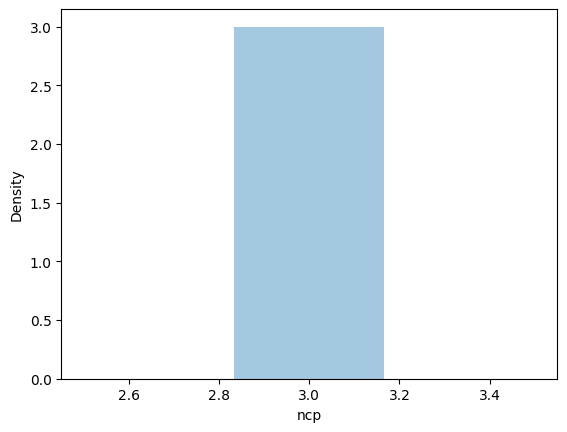

<IPython.core.display.Javascript object>

In [21]:
sns.distplot(df_obesity[df_obesity.favc == "no"].ncp)

<Axes: xlabel='faf', ylabel='Count'>

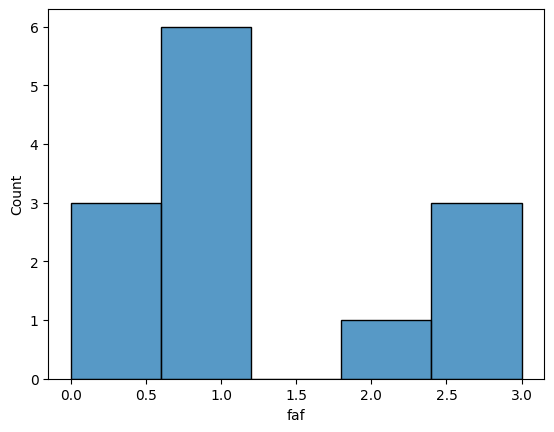

<IPython.core.display.Javascript object>

In [22]:
## faf
sns.histplot(df_obesity[df_obesity.favc == "no"].faf)

---

# `Problem 3`

**`- There is a group of people who do not have a family history with overweight and despite this, they suffer from obesity. What is the cause of this problem?`**

In [74]:
## Filter the DataFrame to select rows where "family_history_with_overweight" is equal to "no"
filtered_df = df_obesity[df_obesity.family_history_with_overweight == "no"]
filtered_df

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
142,Male,23.0,1.74,93.5,no,yes,sometimes,3.0,Frequently,yes,1.0,no,1.0,1.0,Frequently,Automobile,Obesity_Type_I,30.9
257,Male,19.0,1.85,115.0,no,no,sometimes,3.0,Sometimes,no,3.0,yes,1.0,2.0,no,Public_Transportation,Obesity_Type_I,33.6
270,Male,23.0,1.82,107.0,no,yes,sometimes,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_I,32.3
418,Male,18.0,1.70,90.0,no,yes,always,3.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I,31.1
430,Male,18.0,1.65,85.0,no,yes,sometimes,3.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I,31.2


<IPython.core.display.Javascript object>

# `The cause of the problem`


**1- Frequent consumption of high caloric food (FAVC)**</br>
**2- Frequent consumption of high caloric food(SCC)**</br>
**3- Low frequency of physical activity (FAF)**</br>
**4- A lack of the spread of walking as a means of transportation.**</br>

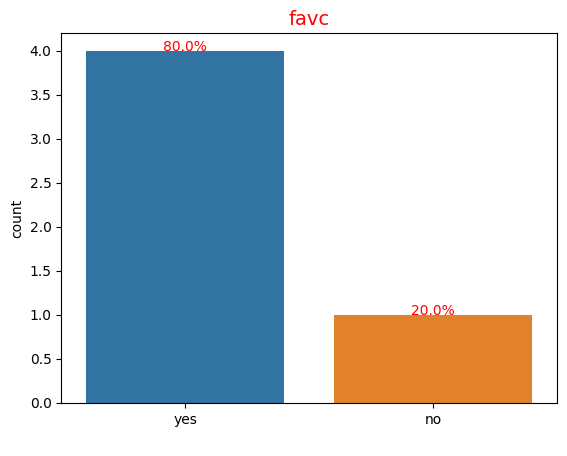

<IPython.core.display.Javascript object>

In [75]:
# Create a countplot for the "favc" column in the filtered DataFrame
axs = sns.countplot(x=filtered_df["favc"])

# Add percentage labels above each bar in the plot
for p in axs.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / len(filtered_df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs.annotate(percentage, (x, y), ha='center', color='r', fontsize=10)

# Set the title for the plot
plt.title('favc', fontsize=14, color='r')

# Set the x-axis label to empty
plt.xlabel(' ')

# Show the plot
plt.show()


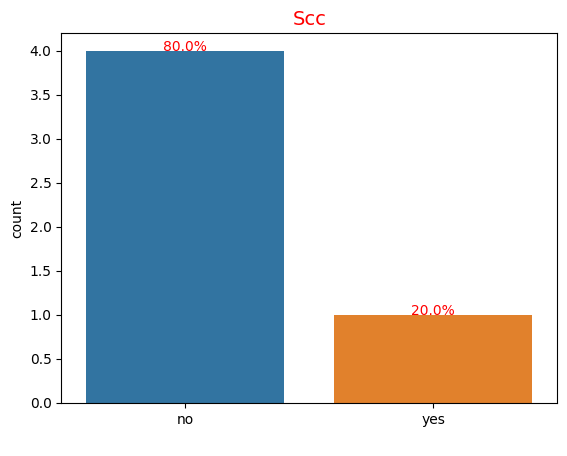

<IPython.core.display.Javascript object>

In [76]:
# Create a countplot for the "scc" column in the filtered DataFrame
axs = sns.countplot(x=filtered_df["scc"])

# Add percentage labels above each bar in the plot
for p in axs.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / len(filtered_df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs.annotate(percentage, (x, y), ha='center', color='r', fontsize=10)

# Set the title for the plot
plt.title('Scc', fontsize=14, color='r')

# Set the x-axis label to empty
plt.xlabel(' ')

# Show the plot
plt.show()


<Axes: xlabel='faf', ylabel='Count'>

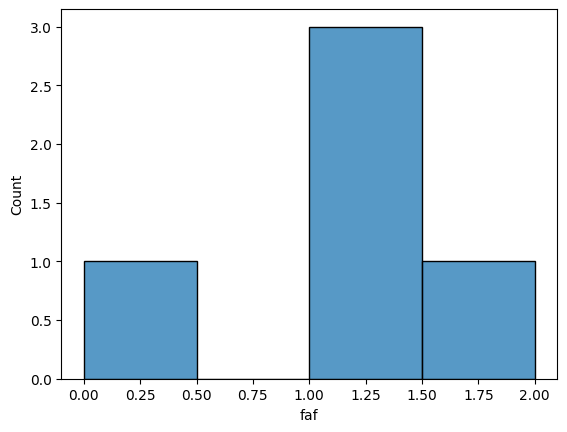

<IPython.core.display.Javascript object>

In [26]:
## faf
####  Create a histogram (histplot) for the "faf" column in the filtered DataFrame
sns.histplot(df_obesity[df_obesity.family_history_with_overweight == "no"].faf)

<Axes: xlabel='mtrans', ylabel='count'>

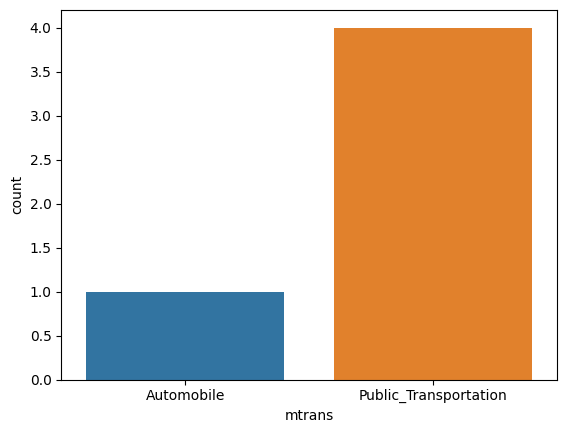

<IPython.core.display.Javascript object>

In [27]:
# Create a count plot for the "mtrans" column in the filtered DataFrame
sns.countplot(x=df_obesity[df_obesity.family_history_with_overweight == "no"].mtrans)

<Axes: xlabel='mtrans', ylabel='faf'>

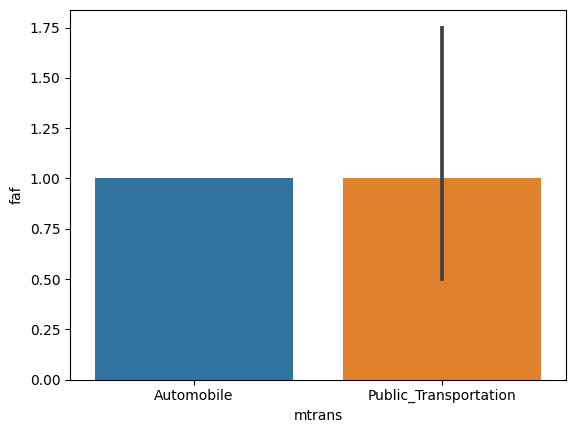

<IPython.core.display.Javascript object>

In [28]:
# Create a count plot for the "mtrans" column in the filtered DataFrame
sns.barplot(data=df_obesity[df_obesity.family_history_with_overweight == "no"],x='mtrans',y='faf')

----------------------------------------------------------

# `2- The causes of the problems of high insufficient weight🤔`

In [11]:
## Filter the DataFrame to select rows where "obesity level" is equal to "Insufficient_Weight"
df_insufficient_weight=df_nature[df_nature['nobeyesdad']=='Insufficient_Weight']
df_insufficient_weight.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
71,Female,22.0,1.67,50.0,yes,no,3.0,3.0,no,no,3.0,yes,2.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight,17.9
75,Female,23.0,1.63,45.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,2.0,0.0,no,Public_Transportation,Insufficient_Weight,16.9
76,Female,24.0,1.60,45.0,yes,no,2.0,3.0,no,no,2.0,no,1.0,0.0,no,Public_Transportation,Insufficient_Weight,17.6
83,Female,19.0,1.60,45.0,no,no,3.0,3.0,no,no,3.0,yes,2.0,0.0,no,Walking,Insufficient_Weight,17.6
140,Male,23.0,1.89,65.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight,18.2


<IPython.core.display.Javascript object>

# **`- Based on the previous analyses conducted at the beginning of the project, it becomes evident that the factors influencing insufficient weight gain."`**</br>
**1- Time using technology devices (TUE)**</br>
**2- Decrease BMI**</br>
**3- Physical activity frequency (FAF),**</br>


**`1- Time using technology devices (TUE)`**

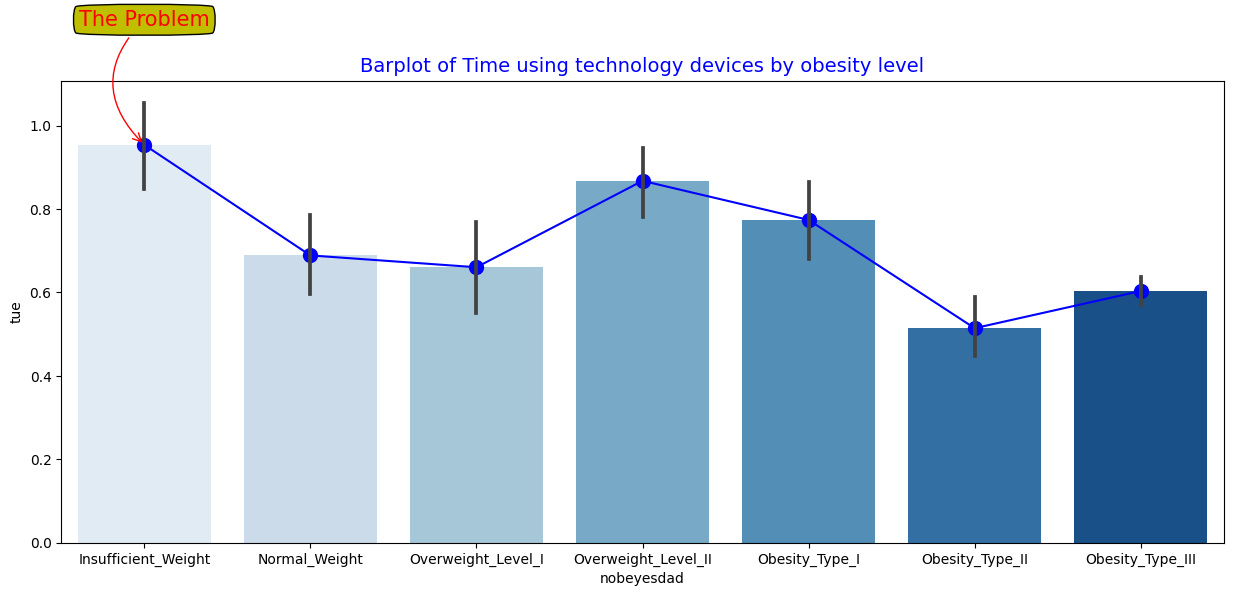

<IPython.core.display.Javascript object>

In [131]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(15, 6))

# Create the lineplot using matplotlib
plt.plot(mean_tue.index, mean_tue.values, marker="o", color="b", markersize=10)

# Create the barplot using seaborn
plot = sns.barplot(data=df_nature, x="nobeyesdad", y="tue", order=order, palette="Blues")

# Add an arrow annotation to the first item
x = plot.patches[0].get_x() + plot.patches[0].get_width() / 2
y = plot.patches[0].get_height()
arrow_properties = dict(
    facecolor='red',
    edgecolor='red',
    arrowstyle='->',
    connectionstyle='arc3,rad=0.5'
)
plt.annotate("The Problem",xy=(x,y),xytext=(x,y + 0.3),size=15, va="center", ha="center",color='r',bbox=dict(boxstyle="round4", fc="y"),arrowprops=arrow_properties)


# Set the title for the plot
plt.title("Barplot of Time using technology devices by obesity level", fontsize=14, color="b")

# Show the plot
plt.show()


**`2- Decrease BMI`**

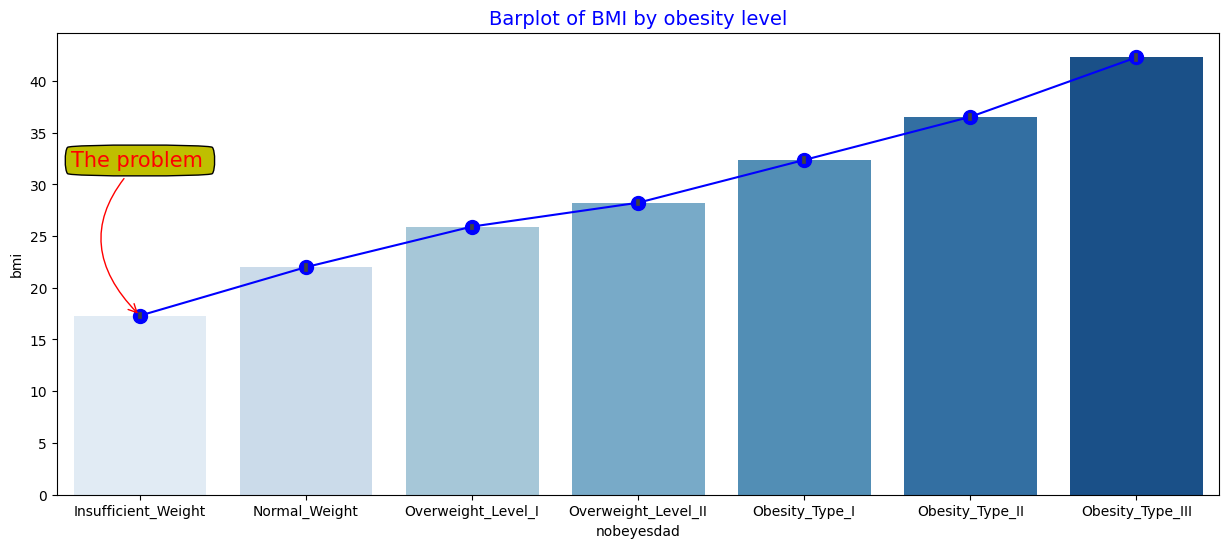

<IPython.core.display.Javascript object>

In [132]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(15, 6))

# Calculate the mean of the "bmi" column
bmi_mean = df_nature.groupby("nobeyesdad")["bmi"].mean()

# Reorder the data based on the specified order
bmi_mean = bmi_mean.reindex(order)

# Create the lineplot using matplotlib
plt.plot(bmi_mean.index, bmi_mean.values, marker="o", color="b", markersize=10)

# Create the barplot using seaborn
plot = sns.barplot(data=df_nature, x="nobeyesdad", y="bmi", order=order, palette="Blues")

# Add an arrow annotation to the first item
x = plot.patches[0].get_x() + plot.patches[0].get_width() / 2
y = plot.patches[0].get_height()
arrow_properties = dict(
    facecolor='red',
    edgecolor='red',
    arrowstyle='->',
    connectionstyle='arc3,rad=0.5'
)
plt.annotate("The problem ",xy=(x,y),xytext=(x,y + 15),size=15, va="center", ha="center",color='r',bbox=dict(boxstyle='round4',fc='y'),arrowprops=arrow_properties)


# Set the title for the plot
plt.title("Barplot of BMI by obesity level", fontsize=14, color="b")

# Show the plot
plt.show()


**`3- Physical activity frequency (FAF)`**

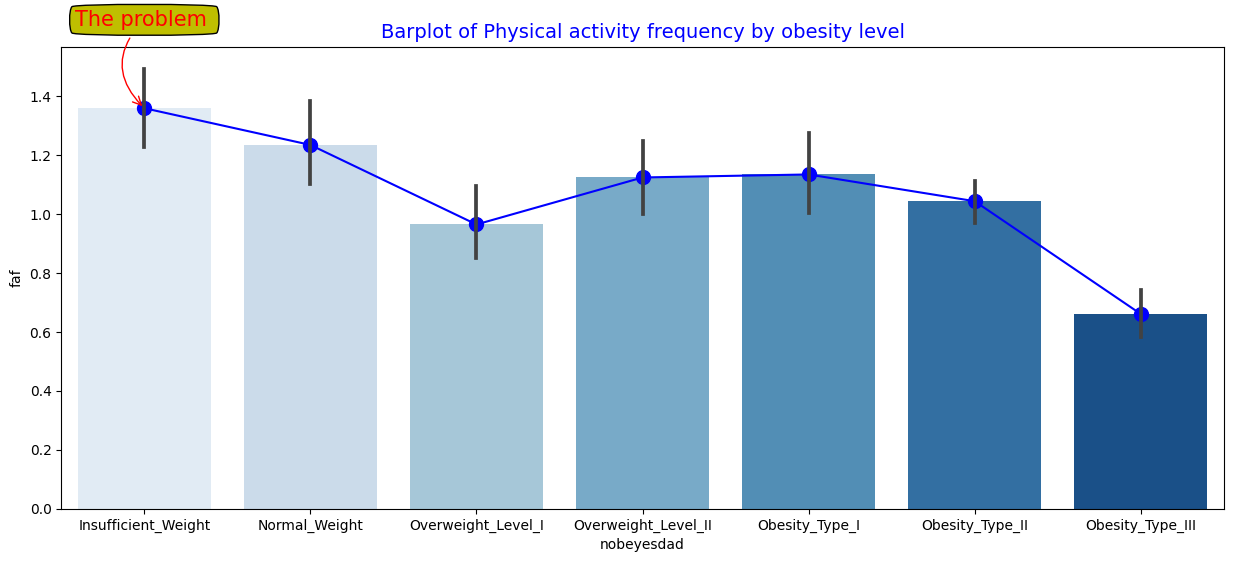

<IPython.core.display.Javascript object>

In [145]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(15, 6))

# Calculate the mean of the "bmi" column
faf_mean = df_nature.groupby("nobeyesdad")["faf"].mean()

# Reorder the data based on the specified order
faf_mean = faf_mean.reindex(order)

# Create the lineplot using matplotlib
plt.plot(faf_mean.index, faf_mean.values, marker="o", color="b", markersize=10)

# Create the barplot using seaborn
plot = sns.barplot(data=df_nature, x="nobeyesdad", y="faf", order=order, palette="Blues")

# Add an arrow annotation to the first item
x = plot.patches[0].get_x() + plot.patches[0].get_width() / 2
y = plot.patches[0].get_height()
arrow_properties = dict(
    facecolor='red',
    edgecolor='red',
    arrowstyle='->',
    connectionstyle='arc3,rad=0.5'
)
plt.annotate("The problem ",xy=(x,y),xytext=(x,y + 0.3),size=15, va="center", ha="center",color='r',bbox=dict(boxstyle='round4',fc='y'),arrowprops=arrow_properties)


# Set the title for the plot
plt.title("Barplot of Physical activity frequency by obesity level", fontsize=14, color="b")

# Show the plot
plt.show()


# `The causes of the problems of  insufficient weight`
**`1- Increase Physical activity frequency (FAF) with low the number of main meals (NCP) `**</br>
**`2- Increase time using technology devices (TUE)`**</br>
**`3-Decrease BMI `**</br>



<a id="1"></a>
# <div style="text-align: center; background-color: #b38a57; color: white; padding: 14px; line-height: 1;border-radius:20px">Final Report </div>

# `The main problems`
**`1-High obesity rate , which represents (53%)`**</br>
**`2-High insufficient overweight rate , which represents (10%)`**</br>

------------------------------------------------

<a id="1"></a>
# <div style="text-align: center; background-color: #569db3; color: white; padding: 14px; line-height: 1;border-radius:20px">Problem 1 ( High obesity rate ) </div>

# `- Factors that affect the increase in obesity`
**`1- They have a family history of being overweight`**</br>
**`2- Frequent consumption of high caloric food`**</br>
**`3- Not monitoring calorie consumption `**</br>
**`4- The lack of widespread walking as a means of transportation`**</br>
**`5- Low frequency of physical activity`**</br>
**`6- Increased number of main meals`**</br>

<a id="1"></a>
# <div style="text-align: center; background-color: #b38a57; color: white; padding: 14px; line-height: 1;border-radius:20px">Here are some recommended solutions for each of the identified factors:</div>

**`1- Family History of Overweight:`**</br>
* Encourage regular health check-ups and screenings for individuals with a family history of obesity or related health conditions. </br>
* Promote awareness of genetic predisposition and the importance of lifestyle modifications.</br>

**`2- Frequent Consumption of High-Caloric Food:`**
*  Increase nutrition education and awareness to help individuals make healthier food choices.</br>
*  Implement food labeling and provide clear information about calorie content and nutritional value.</br>
*  Encourage home-cooked meals with a focus on balanced and nutritious ingredients.</br>

**`3- Lack of Calorie Consumption Monitoring:`**
 * Promote the use of food tracking apps or journals to help individuals monitor their calorie intake.</br>
 * Educate individuals on how to read nutrition labels and make informed decisions.</br>
 * Provide access to registered dietitians for personalized dietary guidance .</br>
 
 **`4- Lack of Widespread Walking as Transportation:`**
   - Develop pedestrian-friendly infrastructure, including sidewalks and safe crosswalks.
   - Promote active transportation options such as walking and cycling.
   - Implement policies that incentivize the use of public transportation and non-motorized modes.
   
 **`5- Low Frequency of Physical Activity:`**
   - Create opportunities for physical activity in schools, workplaces, and communities.
   - Promote sports and recreational programs for people of all ages.
   - Encourage regular exercise as part of a healthy lifestyle.

**`6- Increased Number of Main Meals:`**
   - Encourage portion control and mindful eating.
   - Promote the consumption of balanced meals with a variety of fruits, vegetables, lean proteins, and whole grains.
   - Educate on the importance of meal timing and spacing.

<a id="1"></a>
# <div style="text-align: center; background-color: #b38a57; color: white; padding: 14px; line-height: 1;border-radius:20px">Subproblems in high obesity rate:</div>

# `Problem 1`
**`After studying a group of people suffering from obesity, it was found that they monitor their calorie consumption, yet they suffer from obesity for the following reasons:`**
 -  Frequent consumption of high caloric food (FAVC)
 -  Increased number of main meals (NCP)
 -  Low frequency of physical activity (FAF)
 -  NO consumption of food between meals (CAEC)
 -  No consumption of vegetables in eating (FCVC)

# `Problem 2 `
**`There is a group of people who do not eat foods that contain high calories, and despite this they suffer from obesity.What is the cause of this problem?
`**
- They have a family history of being overweight
-  Sometimes food is consumed between meals, with a reduction in physical activity, and a lack of the spread of walking as a means of transportation.
-  Increased number of main meals (NCP)
 

# `Problem 3`
**`There is a group of people who do not have a family history with overweight and despite this, they suffer from obesity. What is the cause of this problem?`**
- Frequent consumption of high caloric food (FAVC)
- Frequent consumption of high caloric food(SCC)
- Low frequency of physical activity (FAF)
- A lack of the spread of walking as a means of transportation.


<a id="1"></a>
# <div style="text-align: center; background-color: #569db3; color: white; padding: 14px; line-height: 1;border-radius:20px">Problem 2 ( Insufficient overweight rate ) </div>

# `The causes of the problems of  insufficient weight`
**`1- Increase Physical activity frequency (FAF) with low the number of main meals (NCP) `**</br>
**`2- Increase time using technology devices (TUE)`**</br>
**`3-Decrease BMI `**</br>

<a id="1"></a>
# <div style="text-align: center; background-color: #b38a57; color: white; padding: 14px; line-height: 1;border-radius:20px">Here are some recommended solutions for each of the identified causes of insufficient weight:
</div> 

**``1. Increase Physical Activity Frequency (FAF) with Low Number of Main Meals (NCP):``**
   - Encourage individuals with insufficient weight to engage in regular physical activity, but ensure that it is balanced and not excessive.
   - Emphasize the importance of maintaining a sufficient number of main meals to meet nutritional needs.
   - Consult with a healthcare professional or registered dietitian to create a balanced meal plan that supports healthy weight gain.

**``2. Increase Time Using Technology Devices (TUE):``**
   - Promote a balanced lifestyle that includes screen time moderation and physical activity.
   - Encourage outdoor activities and hobbies that reduce sedentary behavior.
   - Set time limits on screen usage, especially for children and adolescents.

**``3. Decrease BMI:``**
   - If a decrease in BMI is due to an underlying health issue, individuals should seek medical evaluation and treatment.
   - For individuals with insufficient weight resulting from poor dietary choices, provide education on proper nutrition and calorie intake.
   - Encourage regular health check-ups to monitor weight and overall health.``